In [1]:
# State the parameters of the pipeline

disk = '/mnt/pre_epi_seizures/'
baseline_files = 'h5_files/processing_datasets/baseline_datasets_new'
seizure_files = 'h5_files/processing_datasets/seizure_datasets_new'


# Exploratory Data Analysis
from classification.load_for_class import *
import convertpandas as cv_pd
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.kernel_approximation import RBFSampler
from interim_processing import *
import iopes

# Set parameters of analyssis
feature_slot = 'pca_beat_amp_computation'

# Chose hyper-parameters of acquisition (ix of saved files)
hyper_param = 0


patient_list = [4]
lead_list = ['ECG-']
scaler = pp.StandardScaler()
rbf_feature = RBFSampler(gamma=1, random_state=1)
interim_processing = [scaler]
hist_bins = None
dist = None
flag_hist = True
flag_andrews = True
flag_series = True
flag_box = True
flag_pair = True
assign_baseline = 'assign_equal_baseline_seizure'
label_struct = {
                        'inter_ictal':{
                            'label': 'Inter-Ictal Data Points',
                            'color': 'blue',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 0 * 60 )]
                                     },
                        'pre_ictal':{
                            'label': 'Pre-Ictal data points',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 20 * 60, 1000 * 49 * 60 )]
                                     },
                        'ictal':{
                            'label': 'Ictal data points',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 55 * 60 )]
                                 },
                        }
baseline_label_struct = {
                         'baseline':{
                            'label': 'Baseline Data Points',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 120 * 60 )]
                                    },
                        }

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
eda_dir = 'EDAnalysis/'

eda_id = iopes.get_eda_params_path(disk=disk,
                                    eda_dir=eda_dir,
                                    patient_list = patient_list,
                                    lead_list = lead_list,
                                    scaler = scaler,
                                    interim_processing = interim_processing,
                                    hist_bins = hist_bins,
                                    dist = dist,
                                    flag_hist = flag_hist,
                                    flag_andrews = flag_andrews,
                                    flag_series = flag_series,
                                    flag_box = flag_box,
                                    assign_baseline = assign_baseline,
                                    label_struct = label_struct,
                                    baseline_label_struct = baseline_label_struct)
path = disk + eda_dir + eda_id + '/'

('flag_box', True)('flag_series', True)('dist', None)('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('lead_list', ['ECG-'])('interim_processing', [StandardScaler(copy=True, with_mean=True, with_std=True)])('flag_hist', True)('assign_baseline', 'assign_equal_baseline_seizure')('label_struct', {'pre_ictal': {'color': 'yellow', 'intervals_samples': [(1200000, 2940000)], 'label': 'Pre-Ictal data points'}, 'inter_ictal': {'color': 'blue', 'intervals_samples': [(0, 0)], 'label': 'Inter-Ictal Data Points'}, 'ictal': {'color': 'red', 'intervals_samples': [(3000000, 3300000)], 'label': 'Ictal data points'}})('baseline_label_struct', {'baseline': {'color': 'green', 'intervals_samples': [(0, 7200000)], 'label': 'Baseline Data Points'}})('flag_andrews', True)('patient_list', [4])('hist_bins', None)


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['params', 'id']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [3]:
if not os.path.exists(path):
    os.mkdir(path)

In [4]:
# Ingest Seizure Data
path_to_load = disk + seizure_files + '.h5'
path_to_map = disk + seizure_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[hyper_param]

print feature_name


seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, label_struct)
seizure_data

[2018-04-12 02:15:53.154619]:get_signal:20:Loading [signal: 4_FA77745R_ECG-_2017-01-10 15:43:11.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-04-12 02:15:53.200547]:get_signal:20:Loading [signal: 4_FA77745S_ECG-_2017-01-10 17:43:24.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_end

/3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_
closed
closed
closed
data
4
0
data
4
1
data
4
2


eig_value_1  eig_value_2  eig_value_3  eig_value_4    eig_value_5  \
0        6.513496    11.880264   221.498561   518.353744   21545.894899   
1        9.521591    12.014922   178.239020   556.268495   22888.116301   
2        0.746907    12.440772   140.722404   547.727903   22785.529144   
3        1.322172    26.854897   125.358313   460.486663   23876.247291   
4       11.264431    28.392812    72.344836   543.434942   24401.598939   
5       15.624784    27.899970    61.606290   109.999033   25016.841256   
6        6.819156    27.274336    77.535713   189.720408   23872.243210   
7       22.435949    40.740754   153.239605   175.458390   23654.695129   
8        6.738088    48.416884   126.638337   189.219615   23290.553960   
9       13.556891    23.994532   185.565948   449.198709   24703.701807   
10       6.835843    42.995143   394.271132   507.462506   26753.821754   
11      11.661093   307.797394   388.116824  1421.129670   24631.908667   
12      68.316751   295.537768  1172.625836  4429.636829   22240.490554   
13     115.961910   251.538450  1174.441854  4410.427181   19906.841793   
14      19.542914   283.580363  1140.600885  4365.548946   16295.860722   
15       5.159021    57.692746   743.964722  4014.918466   12895.484320   
16      12.273327    18.694134   218.901827  3018.575569   14388.468372   
17      13.195245    18.813591    32.551017   297.286731   15505.439862   
18       2.869681    25.656235    51.451993   283.194289   16683.981863   
19      15.232857    40.572098   107.917948   284.534516   17686.975338   
20      13.859817    48.894965   183.690599  1317.292040   17324.322379   
21      15.639109    50.113843   109.663556  1455.479704   18087.457790   
22      13.040074   106.473307   439.131957  1350.584253   19325.107404   
23      58.597118   245.011615   445.226670  1712.606022   20122.917665   
24      48.653855   265.109015   516.502712  1534.265822   19544.945350   
25      33.859445    82.158643   537.346622  1638.959332   18103.548315   
26      34.009948    84.048770   194.378400  1502.555889   17424.224314   
27      32.977606    72.506011   148.450437  1559.944366   15388.942871   
28      24.896596    36.760169   299.221050  1148.076316   15770.741241   
29      17.364020    36.371018   238.275649  1061.588168   16565.733943   
...           ...          ...          ...          ...            ...   
2362     7.133571    68.947553   236.665790   446.417615  187952.207768   
2363    23.206086    65.417802   156.571137   492.601189  172521.996711   
2364    10.792968    46.229149   235.571524  1575.961473  166805.425842   
2365    45.379009   177.618290   324.347294  1557.476114  152294.314010   
2366    37.684316   177.622383   398.407713  1564.163231  139883.903828   
2367    57.256300    95.086536   310.444701  1636.366612  132649.616982   
2368    49.574141   169.321592   371.517491  1874.027652  146130.769236   
2369     6.571382   171.047999   281.549108   431.666097  149304.166874   
2370   159.582678   174.394563   381.374205   487.851320  162179.037880   
2371    67.453003   229.181619   353.985363   787.993810  169072.411856   
2372    15.800004    79.559929   301.717509   808.243870  180750.909866   
2373    19.868422    83.088605   223.394827   437.159224  187231.653914   
2374    22.772077    53.474940   234.698839   360.624335  189995.433948   
2375    16.911000    45.817659   130.334142   771.182911  197478.401310   
2376    18.581701    67.052873   149.078349   538.870780  198695.194361   
2377    16.622092    89.598812   176.240536   657.825737  197520.069631   
2378    24.424564    54.920450   333.933956   588.306390  196876.336723   
2379    27.004969   129.625065   216.136230   564.922049  195227.455967   
2380    30.021915    47.381902   200.039952   504.296824  186845.734928   
2381    20.477554    39.209336   161.109754   336.787061  185357.493304   
2382    10.864963    49.230006   296.713598   428.554525  181354.225032   
2383    15.549506    54.230919 

In [5]:
# Ingest Baseline Data

# set Labeling structure
path_to_load = disk + baseline_files + '.h5'
path_to_map = disk + baseline_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[0]

print feature_name

baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, baseline_label_struct)

baseline_data

[2018-04-12 02:15:53.283798]:get_signal:20:Loading [signal: 4_FA77745O_ECG-_2017-01-10 09:42:32.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-04-12 02:15:53.284698]:get_signal:20:Loading [signal: 4_FA77745P_ECG-_2017-01-10 11:42:46.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_com

/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_
closed
closed
closed
data
4
0
data
4
0
data
4
0


eig_value_1  eig_value_2  eig_value_3  eig_value_4    eig_value_5  \
0       23.463320    98.307318   171.084806  1487.860572   18513.311127   
1       32.950829   107.156511   163.745402  1650.882776   17976.863552   
2       17.190677    51.457699   208.894191  1865.176959   20034.646206   
3        7.725523    44.252973   207.989887  1271.562579   18453.307992   
4        7.352836    12.164050    58.706338   289.628889   18304.737490   
5       11.621965    57.957301   249.562213  1555.502131   20138.038792   
6       18.845002    63.000685   111.336491  1880.738576   22148.261310   
7        7.608402    44.194261   109.231203  1762.609658   20760.102204   
8        4.981360    38.168885   146.127406  1898.229077   21983.610358   
9       23.046032    48.906709    59.524184  1739.669331   24777.685542   
10      10.285371    45.212194   183.013917  1826.185988   20409.004536   
11      13.023255    41.215102   246.818186  1800.800090   20925.300641   
12      15.800474    85.073302   305.056859  1780.063053   23001.745784   
13      78.970970   200.515119   326.165054   964.449267   22507.964774   
14       6.042908   243.889714   341.081293   961.626436   21711.707190   
15       5.255940   242.548539   325.819683  1238.050023   22248.501494   
16       8.407226    15.666144   284.351460  2047.119939   18713.928361   
17       9.018127   121.723136   251.496687  1796.922310   15792.331747   
18       9.535630    86.348233   279.753175  1776.630176   16097.071817   
19       8.942934   185.416654   264.555818  1915.979303   15167.208890   
20      36.320014   143.200200   282.673519  1868.517588   15219.446853   
21      32.804778   167.181410   324.368364  1977.301021   15504.081895   
22      16.794989   138.478864   343.604234  2207.125871   17184.210524   
23      24.977982    75.278808   227.733017  2588.219706   19349.219222   
24      16.803556    73.538861   234.944063  1844.766562   19552.522460   
25      14.441439    21.705632    96.594067  2361.665145   20523.388576   
26       7.445168    29.114102   116.703461  2330.339506   20734.088615   
27       4.128409    69.826188   112.136707  2147.666671   19602.093995   
28      28.288487    74.454136    92.115280  1843.975533   18468.736356   
29       5.772324    45.704880   195.623523  1906.967889   21207.311574   
...           ...          ...          ...          ...            ...   
8512    19.518428   170.485477   252.552324  1144.549115  268293.833096   
8513    15.379406    81.446487   206.577934  1074.429413  266785.283884   
8514    21.234899    95.190591   373.449643  1466.869706  268517.815796   
8515    20.472336   139.708089   295.210743  1866.360425  271524.245299   
8516    14.129642    61.373950   293.207238  1590.621590  283555.026034   
8517     8.553478    49.532765   241.783784   706.304132  300672.013451   
8518    14.821737   145.894598   383.525460   750.267267  317691.103136   
8519    24.300963   170.691008   491.307381   673.903771  324966.131883   
8520   105.139360   271.704361   490.860242   672.744376  334334.720245   
8521    88.879264   317.114169   658.040207   920.415310  342030.244319   
8522   172.147464   330.139275   910.845436  1271.448259  335252.816983   
8523   170.556106   261.700141   994.876014  1080.506845  330917.390377   
8524    84.471458   227.203580   833.888057  1092.123772  322548.625298   
8525    49.481557   331.632327   837.333199   869.460751  313681.720699   
8526    20.104411   161.939967   639.612041   942.485042  303845.675912   
8527    23.471971   135.044245   519.077741   915.252436  282946.799488   
8528    42.695897    81.247536   223.971792   765.456554  253890.271356   
8529    17.826885    83.763873   244.616462   758.886406  234288.535097   
8530     8.933373    61.436285   104.813978   643.613438  230481.561472   
8531     9.577408    61.250851   228.722358   490.998315  232259.408985   
8532     9.964382    69.462957   227.141393   230.605398  249597.834580   
8533     9.067199    75.019762 

In [6]:
# Treat Baseline Data
baseline_data = baseline_data.dropna(axis=0, how='any').reset_index(drop=True)

baseline_data = globals()[assign_baseline](baseline_data,
                                          seizure_data,
                                         'seizure_nr',
                                         'patient_nr')

seizure_data = seizure_data.dropna(axis=0, how='any').reset_index(drop=True)

data = pd.concat([seizure_data, baseline_data],
                 ignore_index=True)
    

4
0
changing ix
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

4
1
changing ix
[8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8130, 8131, 8132, 8133, 8134, 8135, 8136, 8137, 8138, 8139, 8140, 8141, 8142, 8143, 8144, 8145, 8146, 8147, 8148, 8149, 8150, 8151, 8152, 8153, 8154, 8155, 8156, 8157, 8158, 8159, 8160, 8161, 8162, 8163, 8164, 8165, 8166, 8167, 8168, 8169, 8170, 8171, 8172, 8173, 8174, 8175, 8176, 8177, 8178, 8179, 8180, 8181, 8182, 8183, 8184, 8185, 8186, 8187, 8188, 8189, 8190, 8191, 8192, 8193, 8194, 8195, 8196, 8197, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8220, 8221, 8222, 8223, 8224, 8225, 8226, 8227, 8228, 8229, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8239, 8240, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248, 8249, 8250, 8251, 8252, 8253, 8254, 8255, 8256, 8257, 8258, 8259, 8260, 8261, 8262, 8263, 8264,

In [7]:
# Add Seizure Type
cv_pd.add_seizure_types(data,
                        'patient_nr',
                        'seizure_nr',
                        'types_of_seizure',
                        'location')

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


eig_value_1  eig_value_2  eig_value_3  eig_value_4    eig_value_5  \
0        89.247890   153.877779   466.210575  3598.688443   48309.723042   
1        69.286137   125.154967   345.752041  2644.666729   50657.341180   
2        59.644003   123.900853   339.865860  2354.439587   47344.115371   
3        75.214733   216.836405   390.772955   862.946094   42593.466406   
4        28.371694   272.445427   421.017979   703.943805   47035.126789   
5       149.076953   310.342117   499.366890   842.253007   54044.520744   
6       101.616568   329.681048   408.315560  1144.305489   55139.024841   
7       203.362581   374.010028   654.681879  1225.393736   63919.024832   
8        26.818886   347.878696   714.901142  1140.702542   65639.350799   
9        63.059175   301.808912   920.890392  1317.064176   61316.003879   
10       66.924097   392.068972   578.021163  1356.670460   57988.436193   
11       66.404151   276.584590   699.036592  1291.386750   53286.510363   
12       57.350724   195.601005   380.623020   835.747006   54061.754478   
13       63.281926   358.642851   409.892223  1524.504365   50440.102463   
14       44.204614   170.403729  1258.517307  2374.079959   53058.988152   
15       13.509490    57.167793  1045.356378  2365.432954   53084.234517   
16        6.319521   163.797217   637.520060  3002.015456   50898.994285   
17       28.631473    89.721907   521.283495  3382.921479   40102.319518   
18       15.112695    88.430657   155.616645  3444.981015   43147.598802   
19       45.445450   106.305246   157.456484  2143.646860   46103.709928   
20       44.716283    98.467781   277.013965   962.098472   43334.577865   
21       22.879316   100.840227   232.227488   526.840337   48457.870552   
22        9.464505    40.316462   272.514933   768.188643   53778.372617   
23        3.016381    48.845555   224.242614   876.857132   51570.761782   
24       22.480379    57.807520   246.572574   875.919929   48267.726005   
25        6.596316    37.290245   255.869145   957.801912   54016.912135   
26        6.488344    42.446614   184.936705   871.801856   57005.272527   
27       21.314699    54.662382   124.438280  1062.858318   52788.859706   
28       36.121865    92.687290   885.255757  3624.604624   48140.007127   
29       27.496951   240.232276   717.936568  3515.996249   48943.433981   
...            ...          ...          ...          ...            ...   
30562    19.518428   170.485477   252.552324  1144.549115  268293.833096   
30563    15.379406    81.446487   206.577934  1074.429413  266785.283884   
30564    21.234899    95.190591   373.449643  1466.869706  268517.815796   
30565    20.472336   139.708089   295.210743  1866.360425  271524.245299   
30566    14.129642    61.373950   293.207238  1590.621590  283555.026034   
30567     8.553478    49.532765   241.783784   706.304132  300672.013451   
30568    14.821737   145.894598   383.525460   750.267267  317691.103136   
30569    24.300963   170.691008   491.307381   673.903771  324966.131883   
30570   105.139360   271.704361   490.860242   672.744376  334334.720245   
30571    88.879264   317.114169   658.040207   920.415310  342030.244319   
30572   172.147464   330.139275   910.845436  1271.448259  335252.816983   
30573   170.556106   261.700141   994.876014  1080.506845  330917.390377   
30574    84.471458   227.203580   833.888057  1092.123772  322548.625298   
30575    49.481557   331.632327   837.333199   869.460751  313681.720699   
30576    20.104411   161.939967   639.612041   942.485042  303845.675912   
30577    23.471971   135.044245   519.077741   915.252436  282946.799488   
30578    42.695897    81.247536   223.971792   765.456554  253890.271356   
30579    17.826885    83.763873   244.616462   758.886406  234288.535097   
30580     8.933373    61.436285   104.813978   643.613438  230481.561472   
30581     9.577408    61.250851   228.722358   490.998315  232259.408985   
30582     9.964382    69.462957   227.141393   230.6053

In [8]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color', 'types_of_seizure', 'location']
features = [column
            for column in data.columns
            if column not in metafeatures]

# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [9]:
# Interim process the data
for step in interim_processing:
    X = data[features]

    X_norm_np = step.fit_transform(X)

    #X_norm = pd.DataFrame(X_norm_np, columns=X.columns)

    data[features] = X_norm_np

In [10]:
# Modelation
import sklearn.svm as svm
from sklearn.model_selection import *
from sklearn.pipeline import *
import sklearn.naive_bayes as nb
from sklearn.feature_selection import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from keras.utils import np_utils
from classification.keras_neural_nets import *

# Group the data
data_groups = data.groupby(['patient_nr',
                            'seizure_nr',
                            'types_of_seizure',
                            'location'])
group_id = 'seizure_nr'

label = 'label'

data_groups_list = list(data_groups)



# choose Pipeline **Details in pipelines.py 
pipe = Pipeline([('SVC', svm.SVC())])
#pipe = Pipeline([('GaussNB', nb.GaussianNB())])
#pipe = Pipeline([('KNN', KNeighborsClassifier())])
#pipe = Pipeline( [('ANN', KerasClassifier(build_fn=dense_network,
 #                                               input_dim = len(features),
 #                                               output_dim = len(y.unique()),
#                                                verbose=0))])

# choose parameter search method *coherent with Pipeline steps
param_grid = [
               {'SVC__C': [2**i for i in xrange(-5, 11)],
                'SVC__gamma':[2**i for i in xrange(-15, 1)]},
                 ]
#param_grid = [
               #{'GaussNB__priors': [None]},
                 # ]
#param_grid = [
#               {'KNN__n_neighbors': [n + 1 
 #                                     for n in xrange(0, 16, 2)]},
 #                 ]


# define cross-validation strategy 
cv_out = LeavePGroupsOut(n_groups=1)
cv_in = LeavePGroupsOut(n_groups=1)

# choose scoring
scoring = ['f1_macro', 'accuracy']

# choose wether to perform new computation
compute_all_new = True
plot_eda_all_new = True

search_function = GridSearchCV

hyper_param_heat = False
# Get path to save the results
#full_path = get_full_pipeline_name(path_to_save,
#                                   file_to_save,
#                                   pipe, 
#                                   scoring,
#                                   param_grid,
#                                   feature_names,
#                                   cv_out,
#                                   cv_in,
#                                   trial)



# plot_scatter(path_to_save, data_struct, class_metadata)

# plot_full(file_to_save, data_struct, class_metadata)

# Create directory to save results
#make_dir(full_path)


Using TensorFlow backend.


In [11]:
clf_id = iopes.get_eda_params_path(disk=disk,
                                   eda_dir=eda_dir + '/' + eda_id + '/' ,
                                   pipe = str(pipe),
                                   param_grid = param_grid,
                                   cv_out = cv_out,
                                   cv_in = cv_in,
                                   scoring = scoring,
                                   search_function = search_function,
                                   group_id=group_id,
                                   label=label)

path_to_save = disk + eda_dir + eda_id + '/' + clf_id

('search_function', <class 'sklearn.model_selection._search.GridSearchCV'>)('scoring', ['f1_macro', 'accuracy'])('cv_in', LeavePGroupsOut(n_groups=1))('label', 'label')('pipe', "Pipeline(memory=None,\n     steps=[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False))])")('cv_out', LeavePGroupsOut(n_groups=1))('group_id', 'seizure_nr')('param_grid', [{'SVC__gamma': [3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1], 'SVC__C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}])


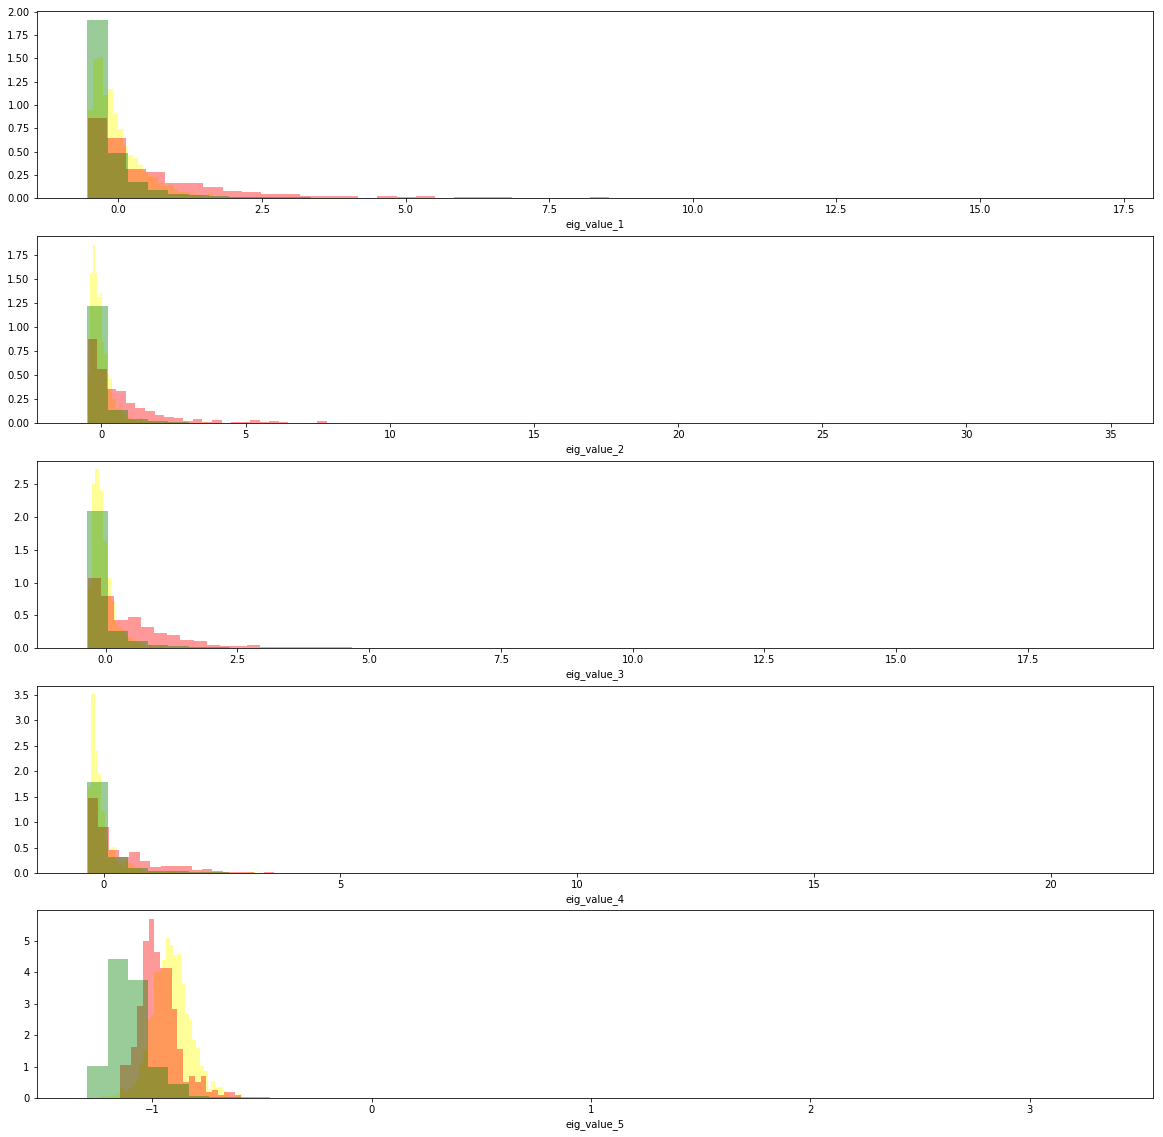

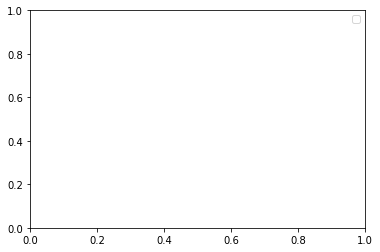

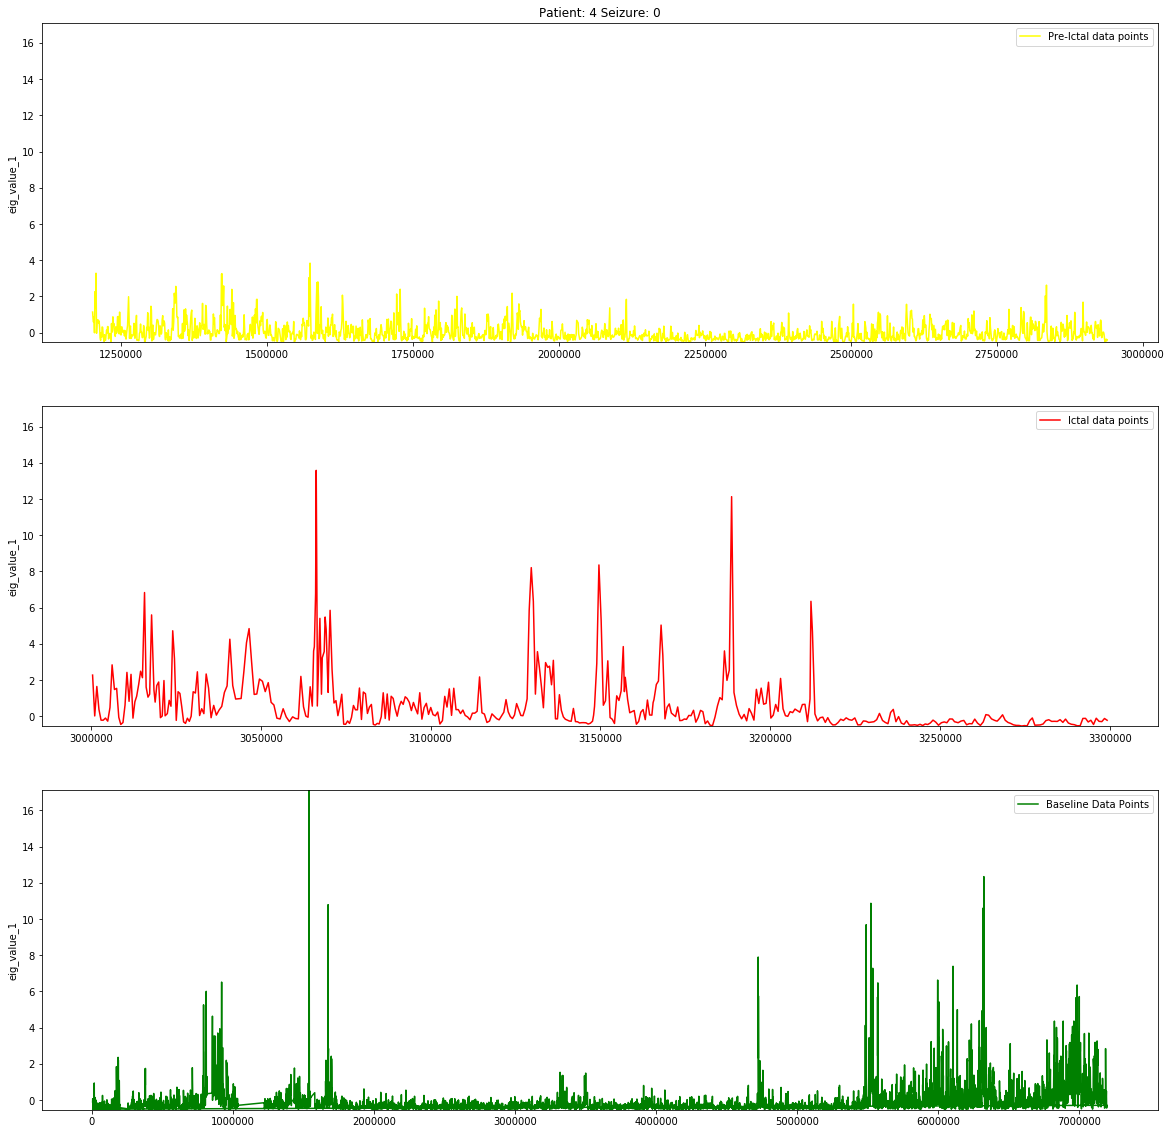

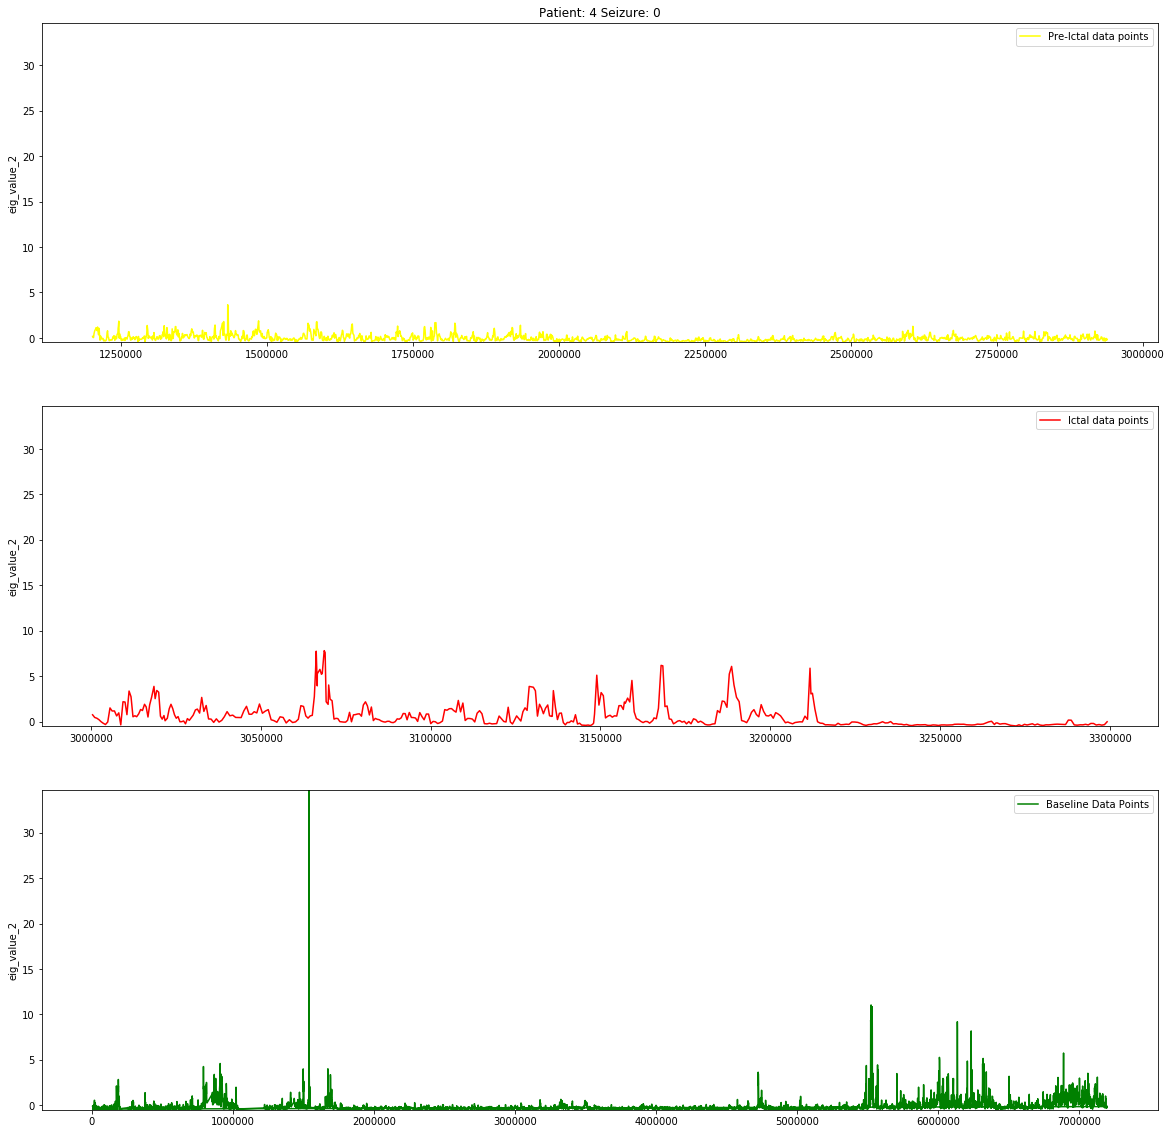

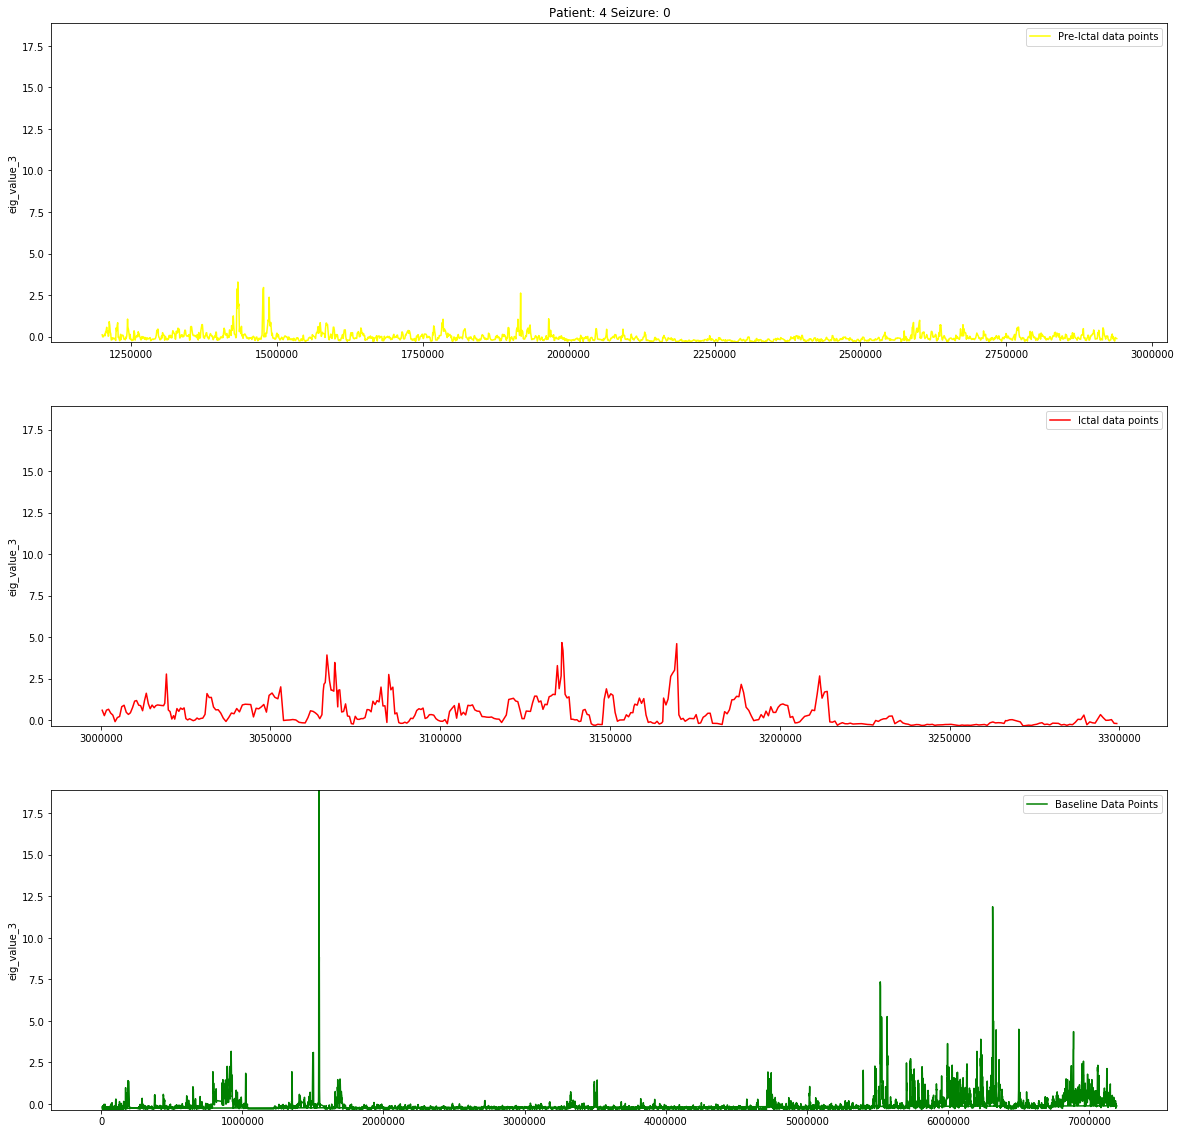

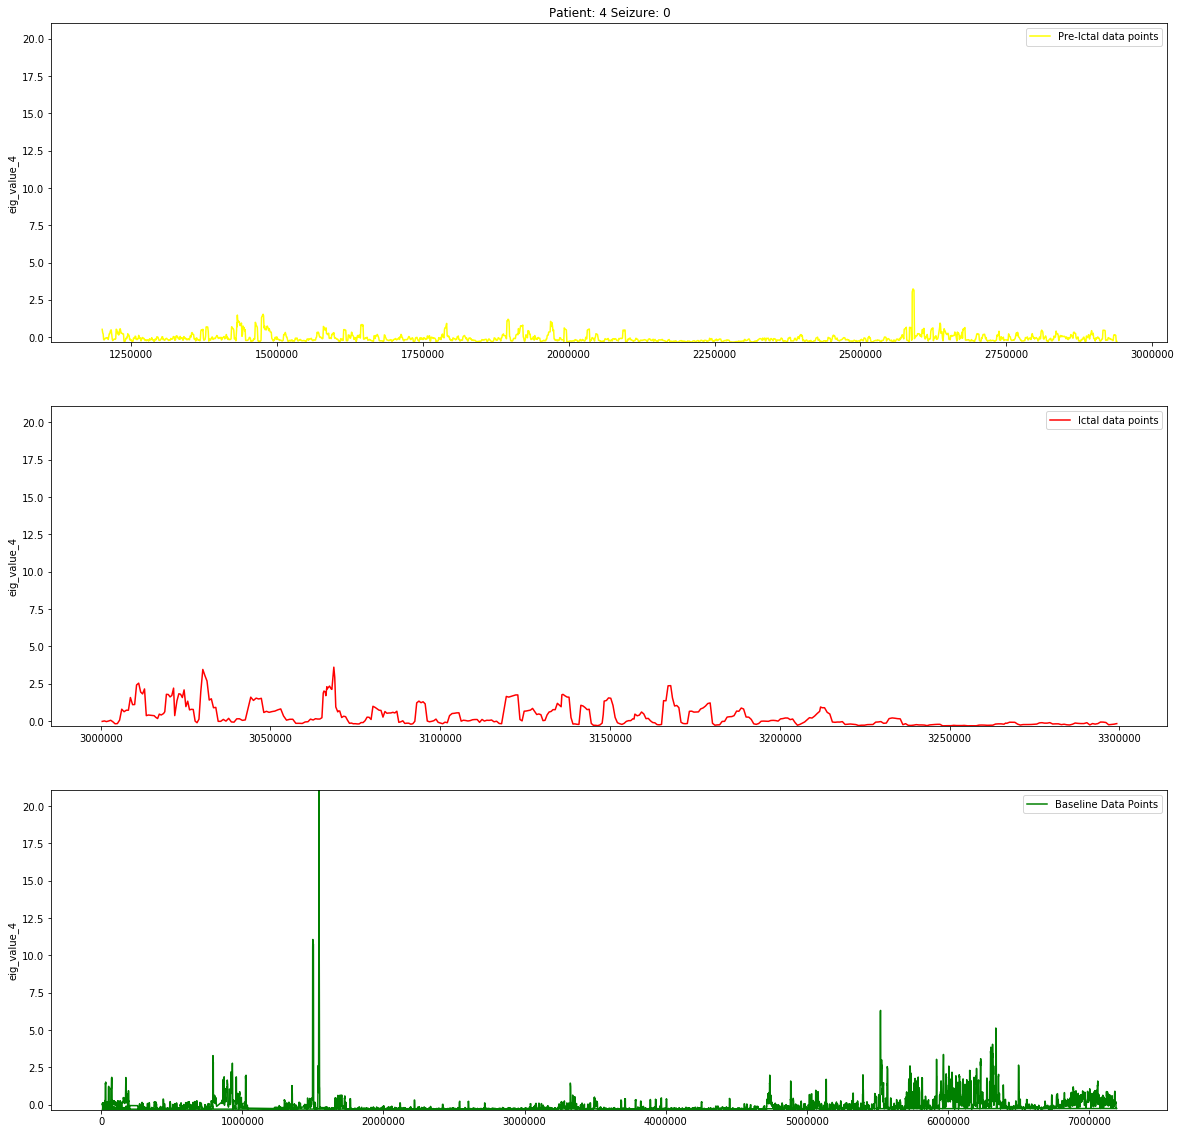

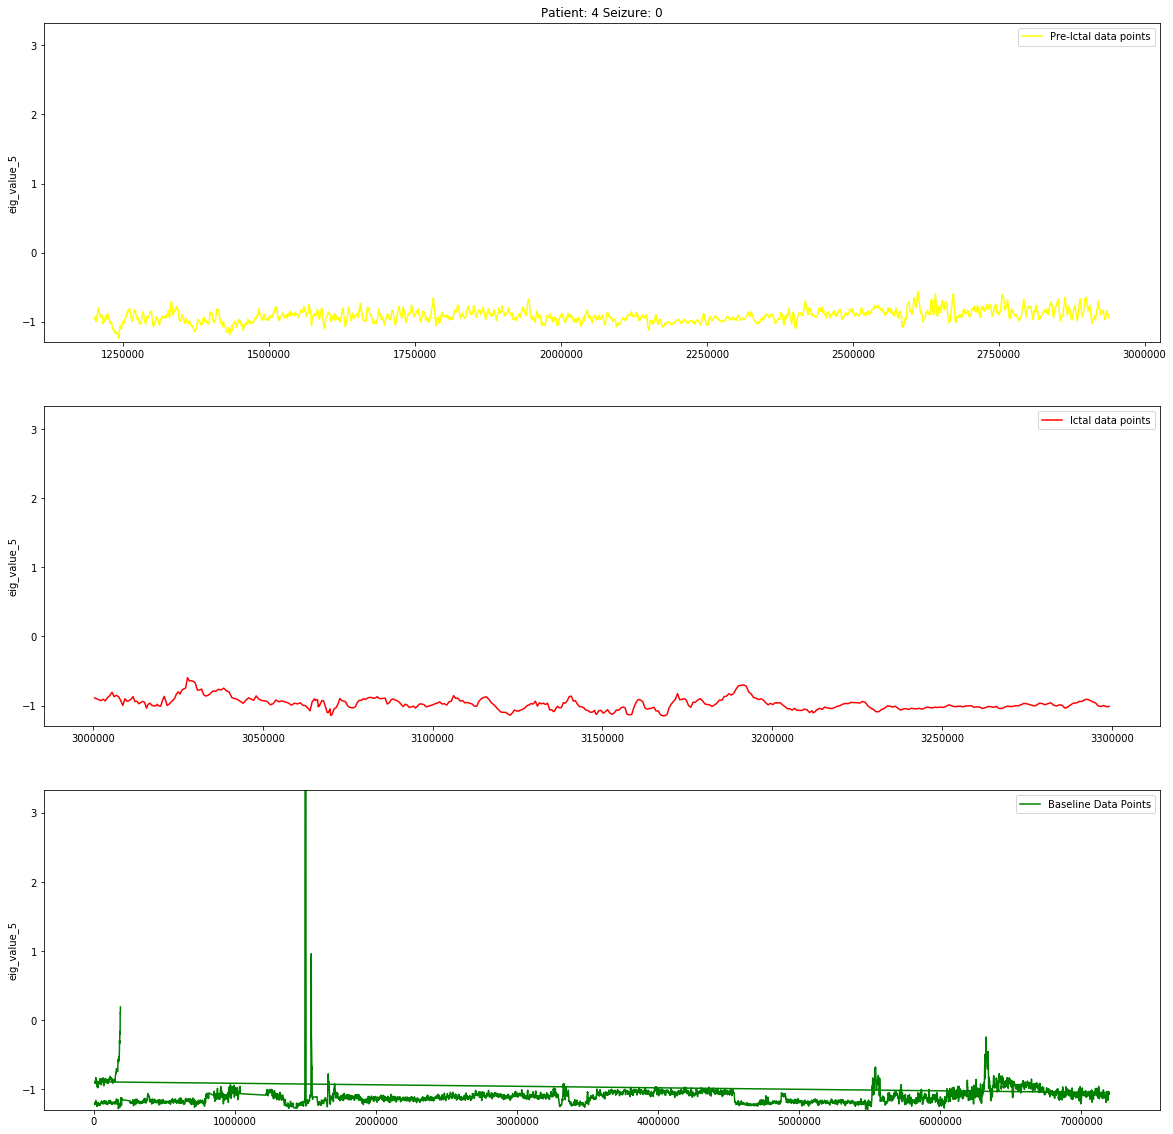

classification/eda/andrews.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


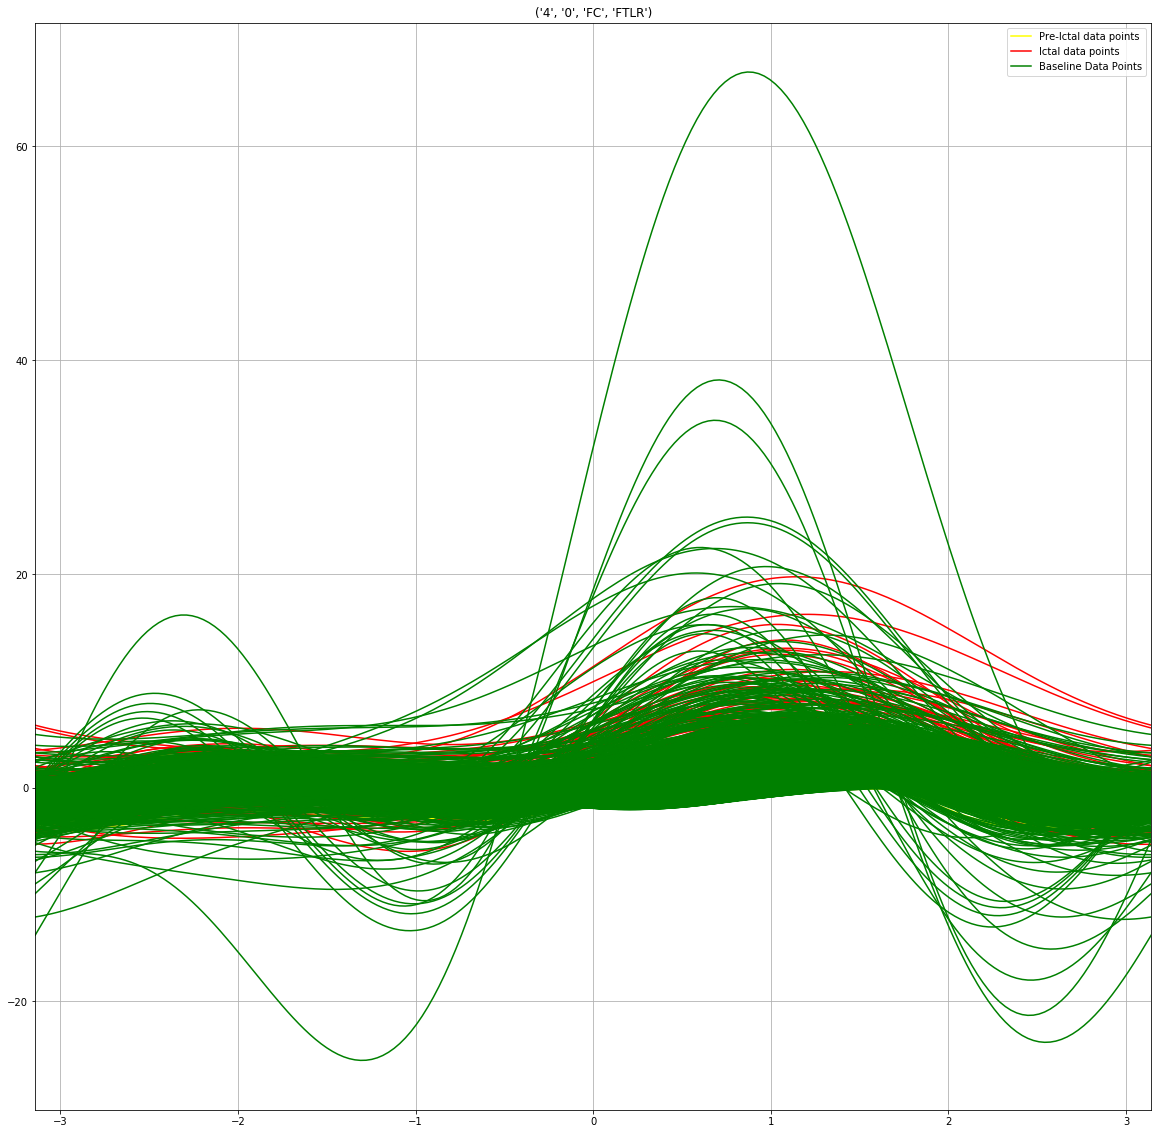

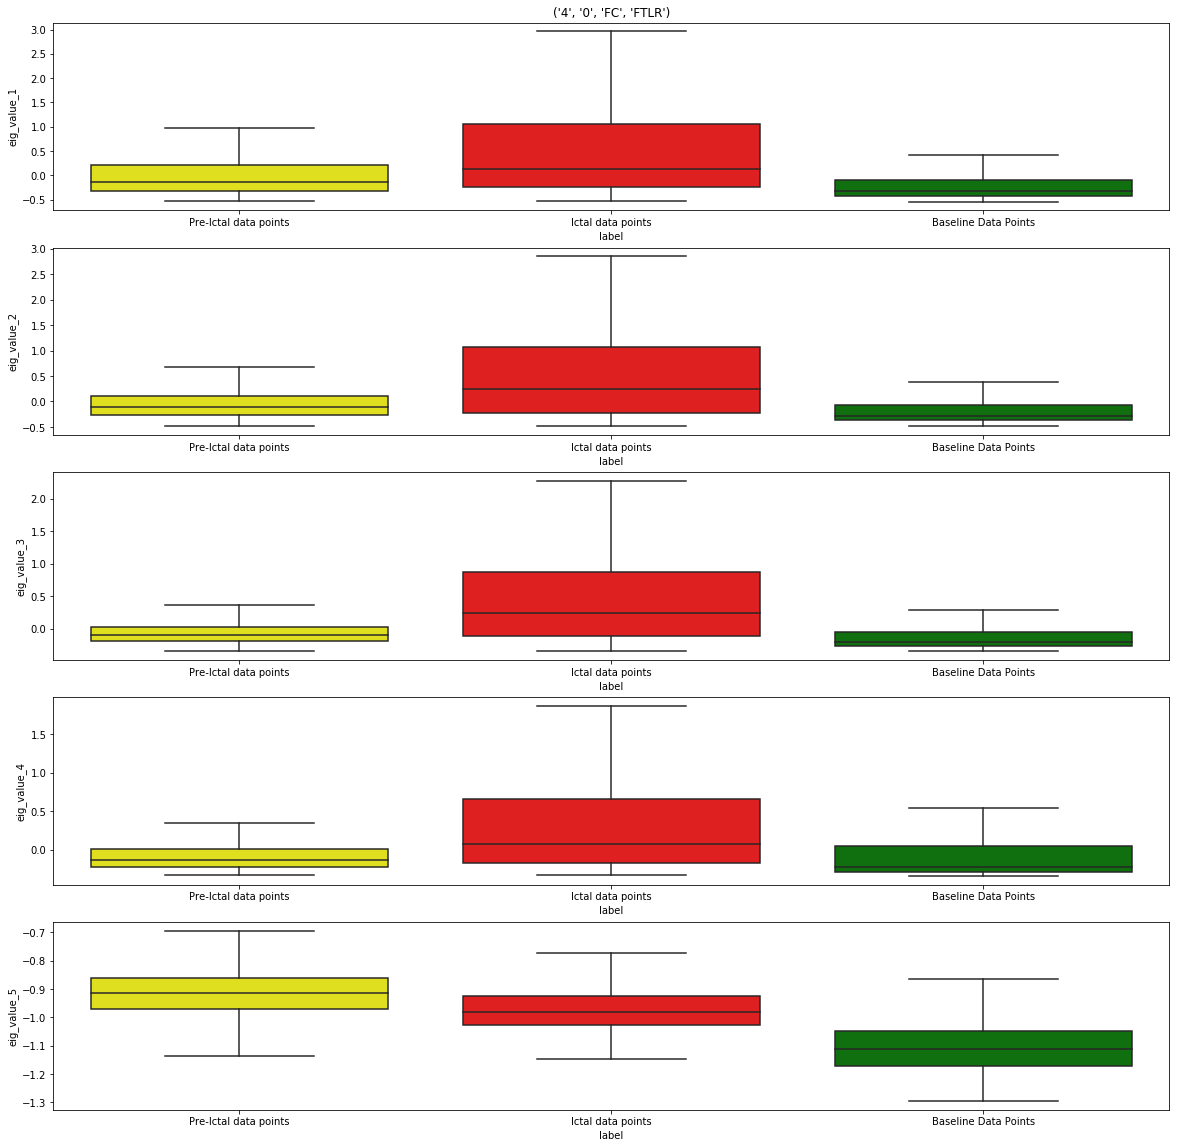

classification/eda/scatter.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


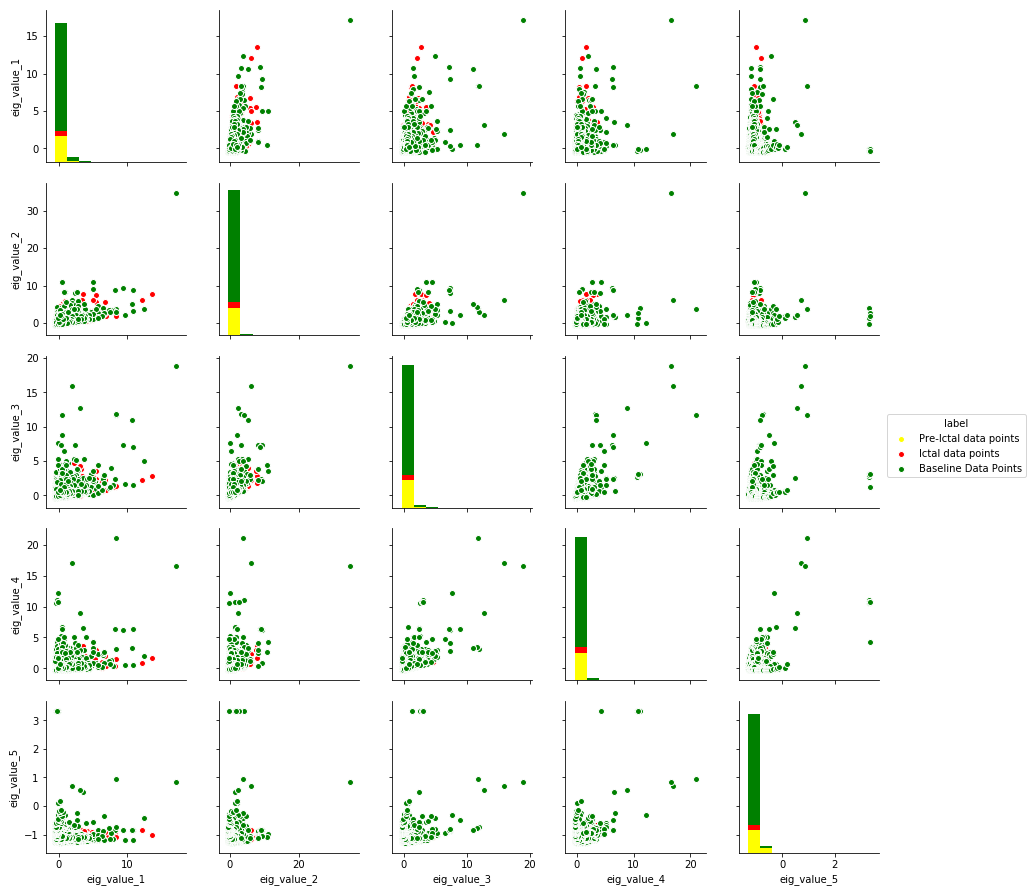

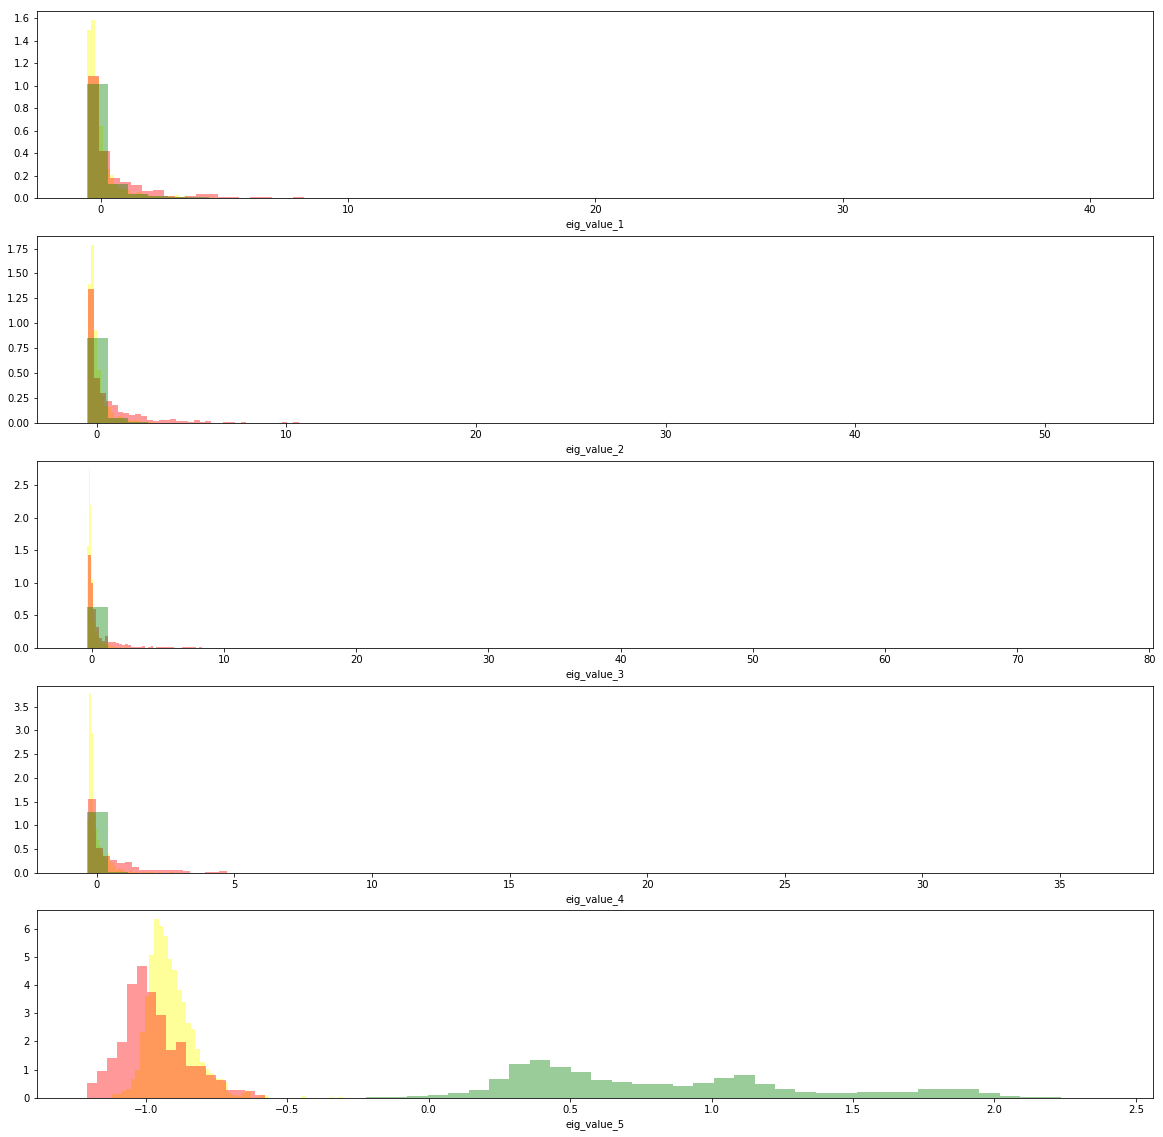

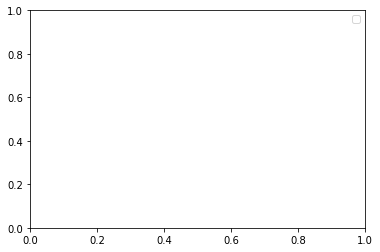

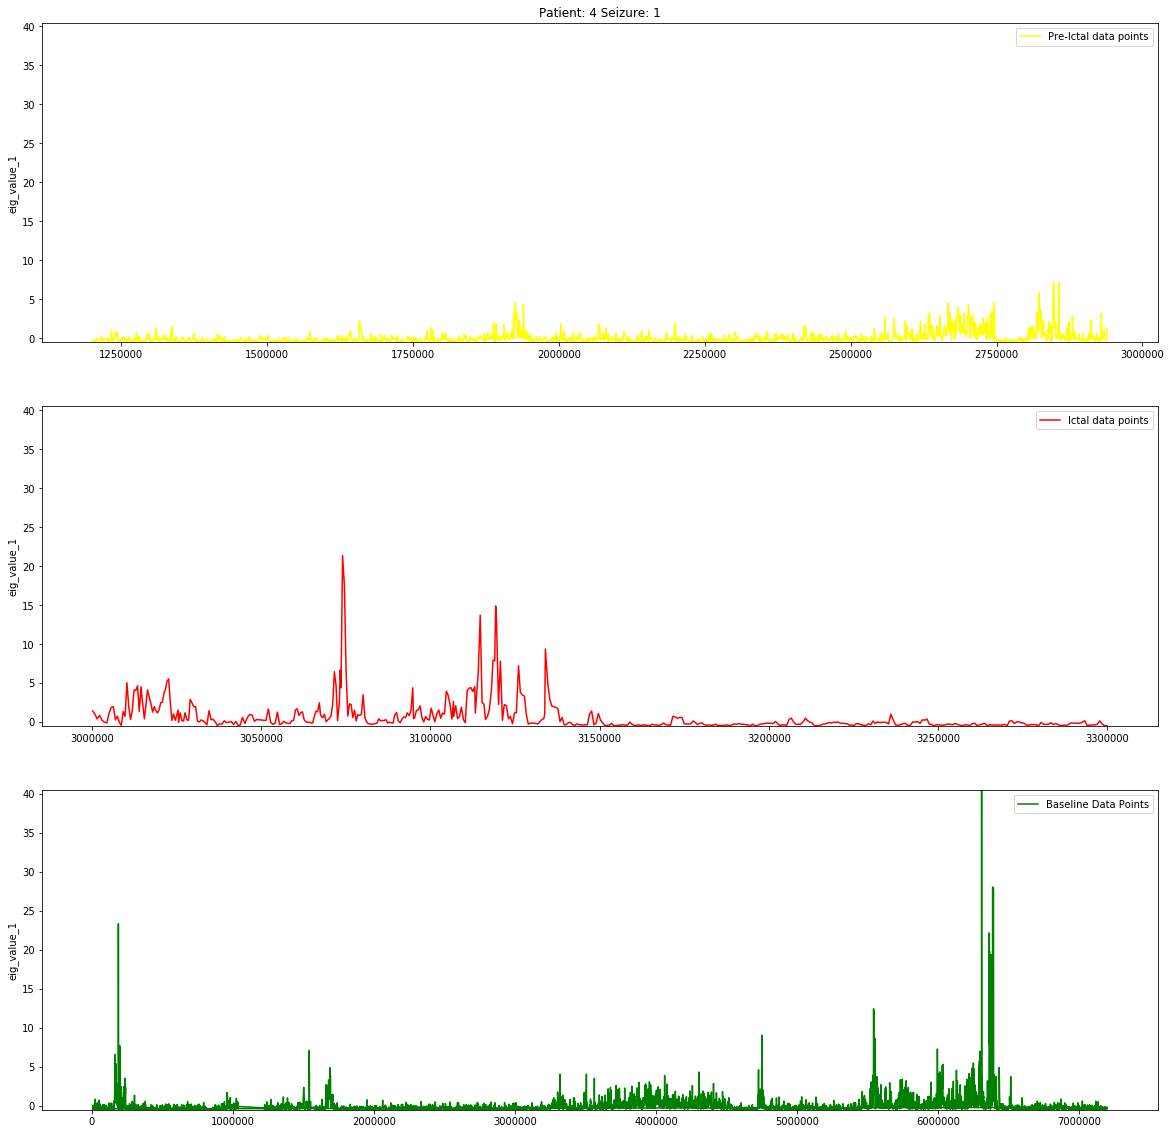

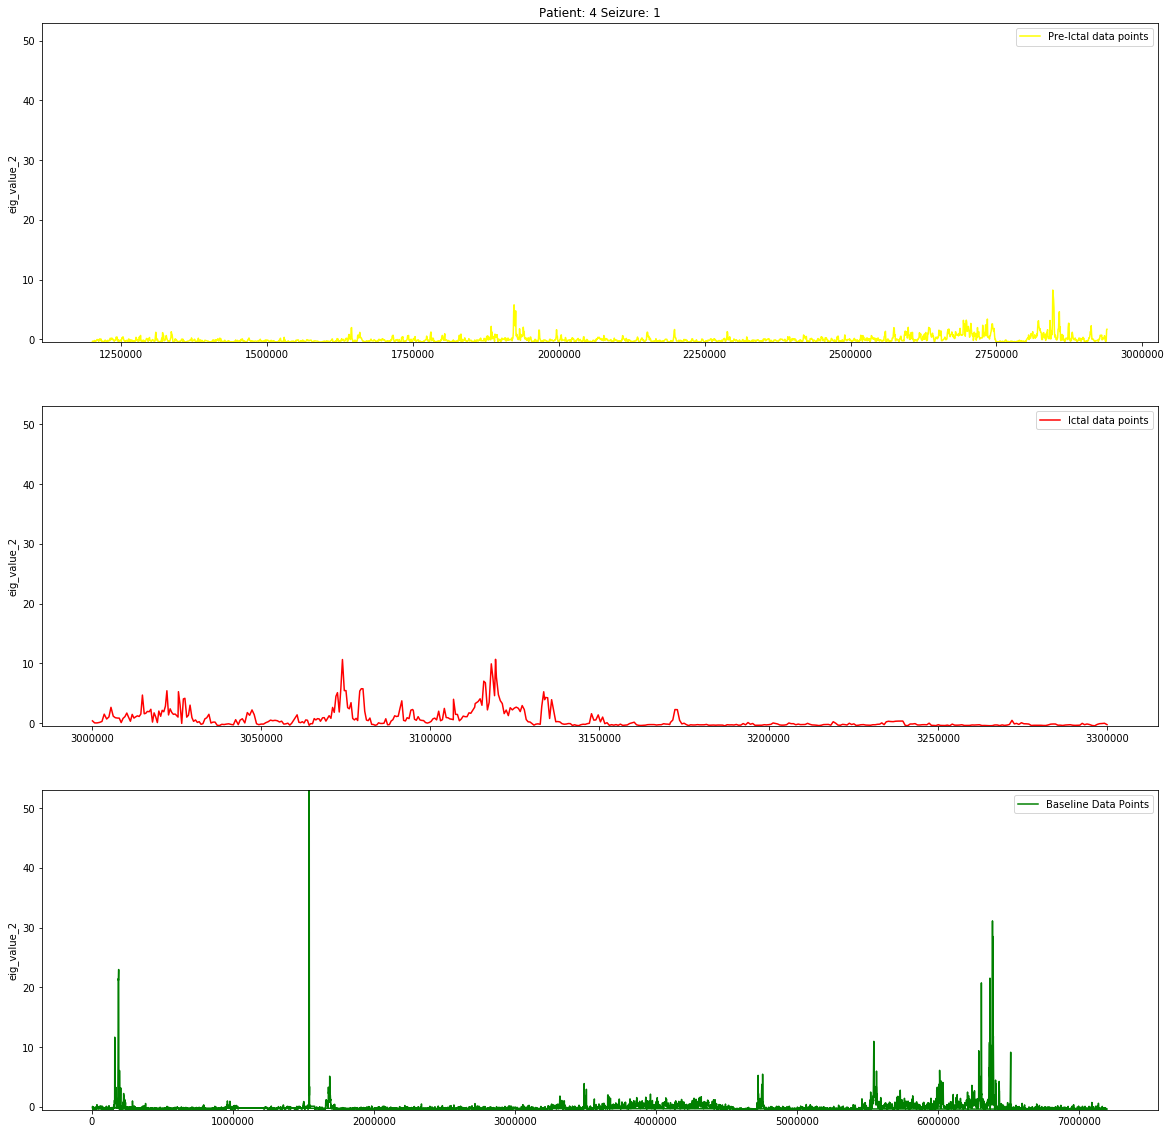

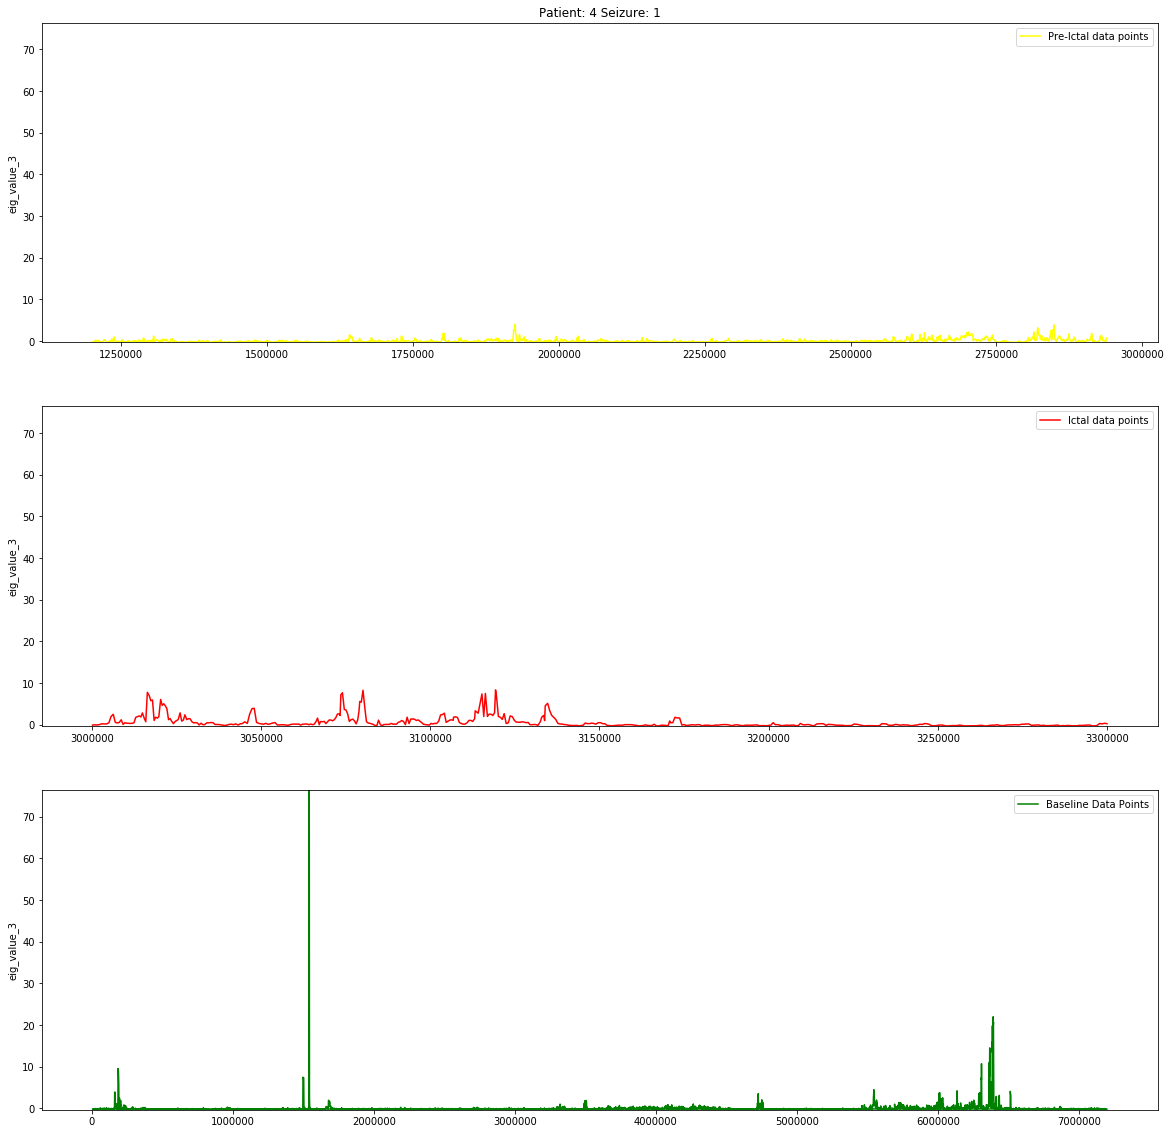

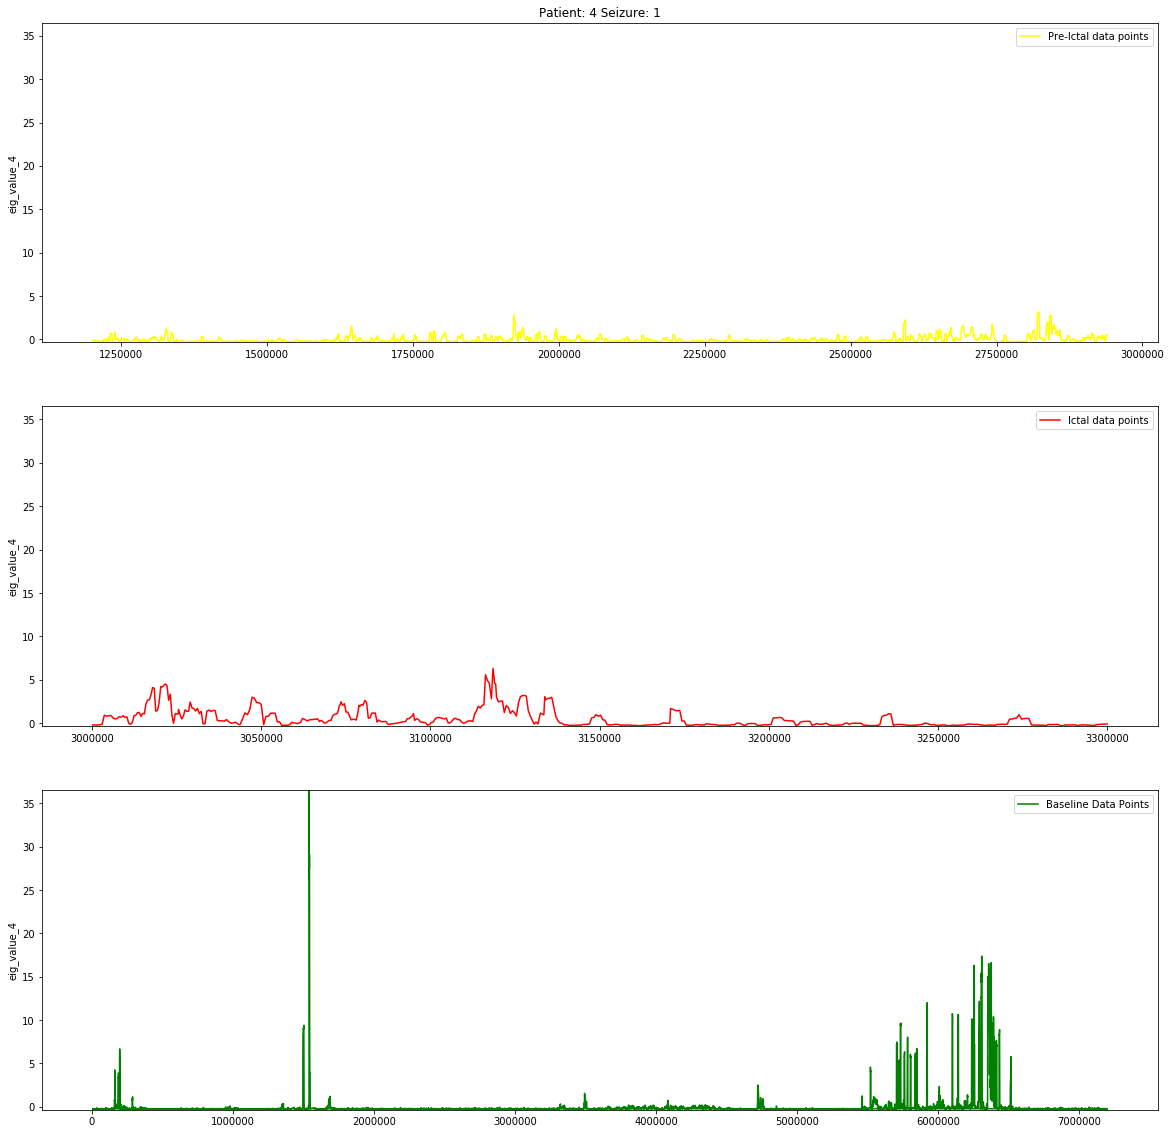

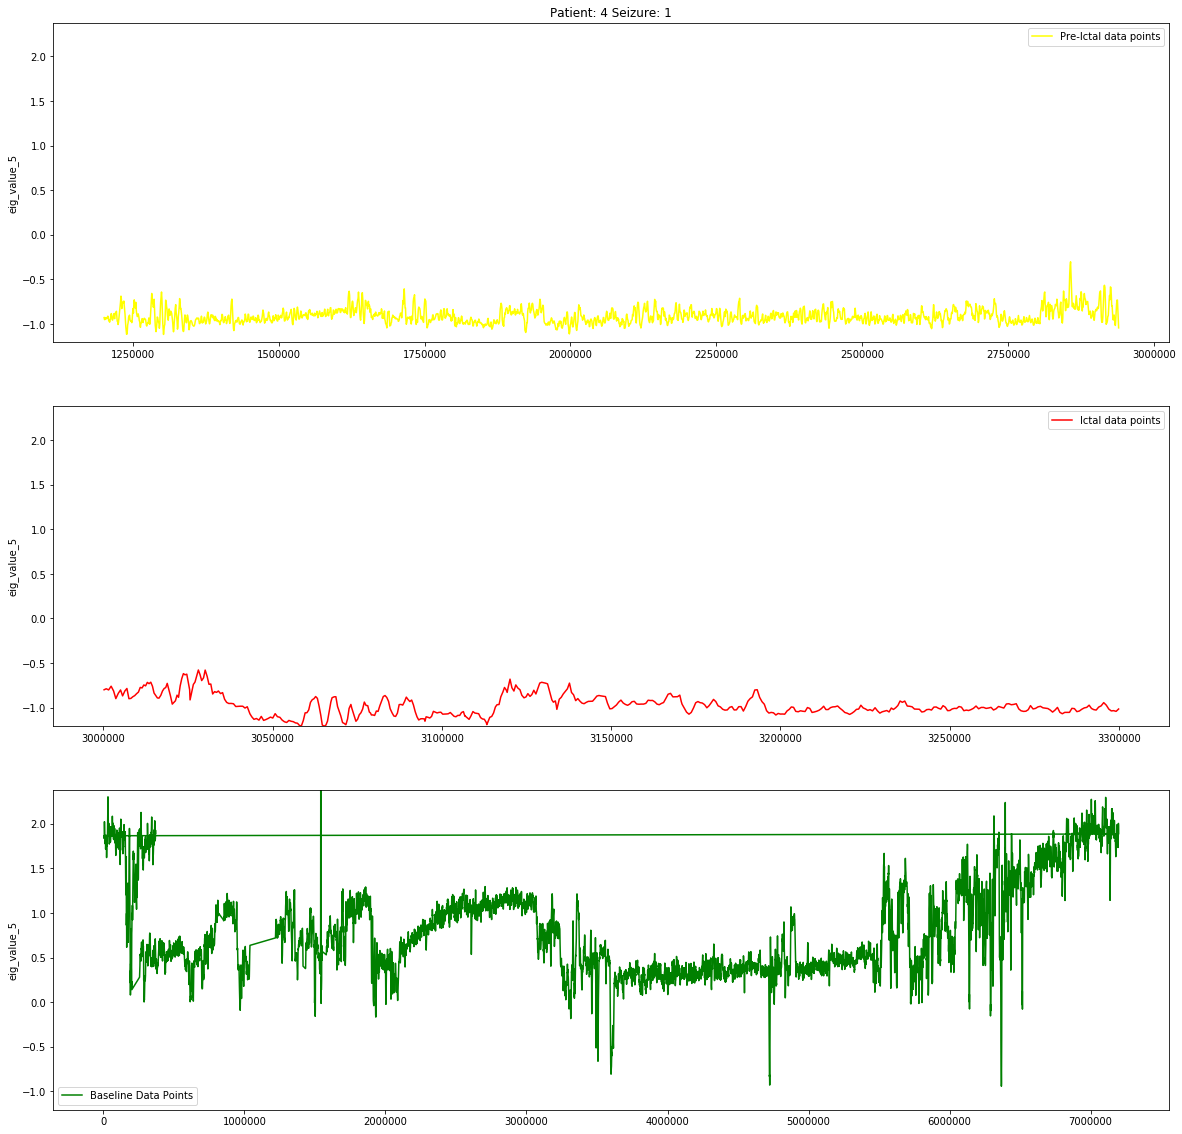

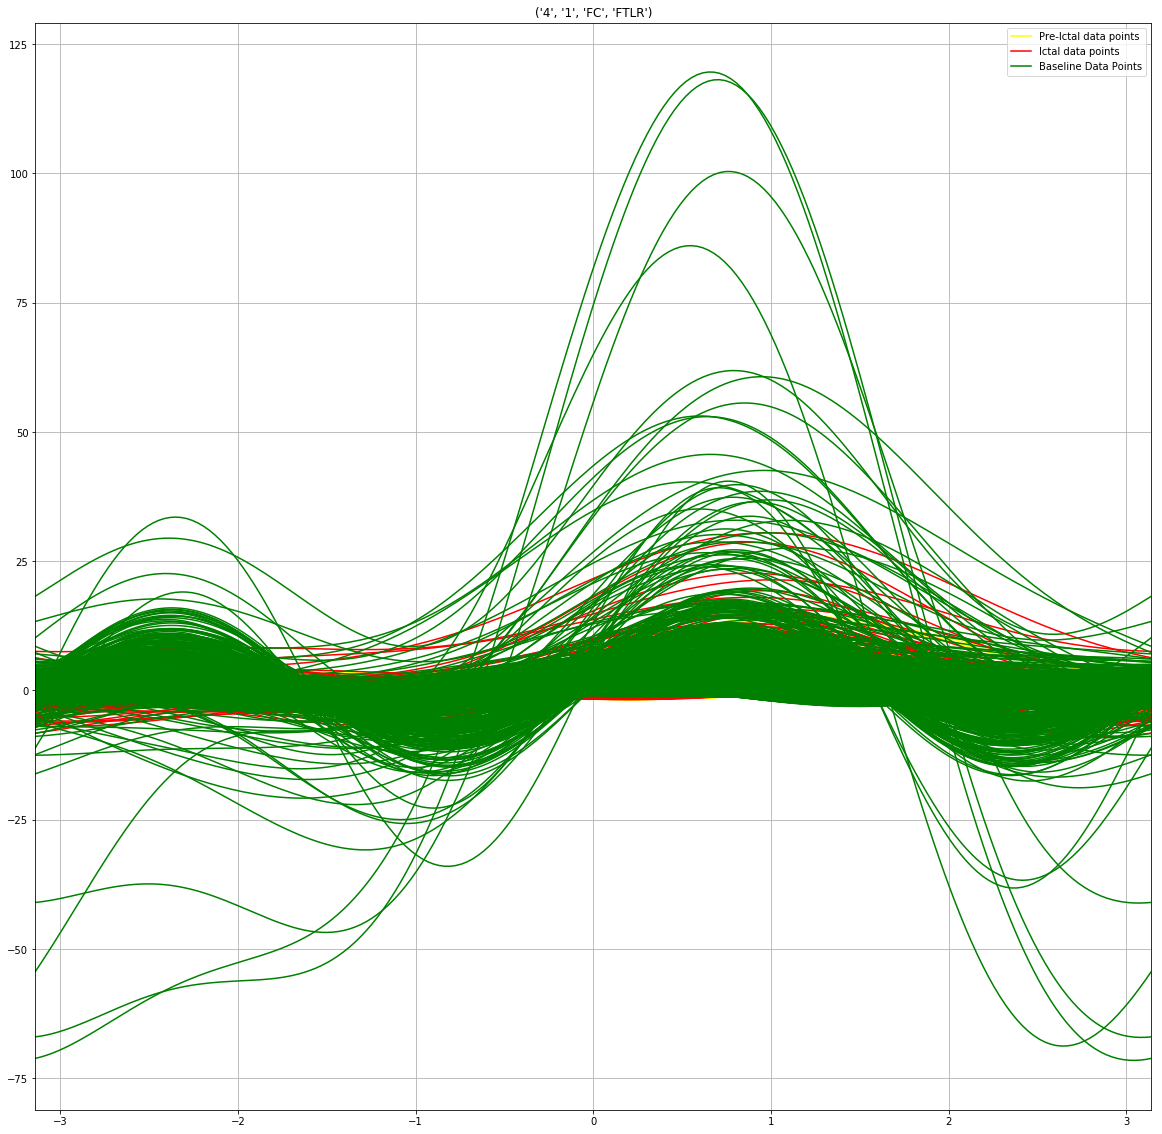

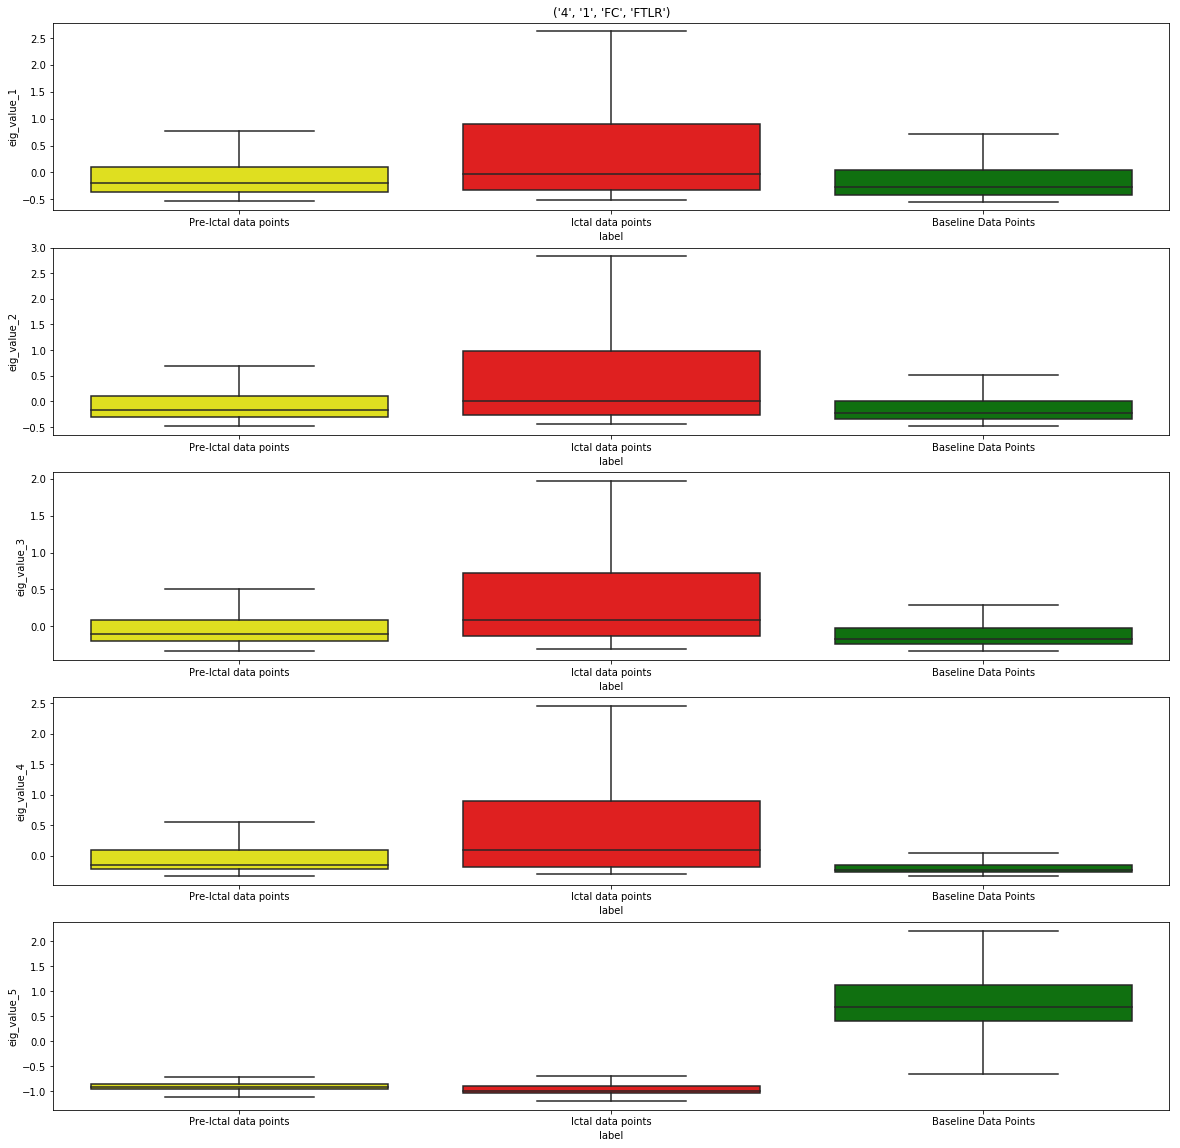

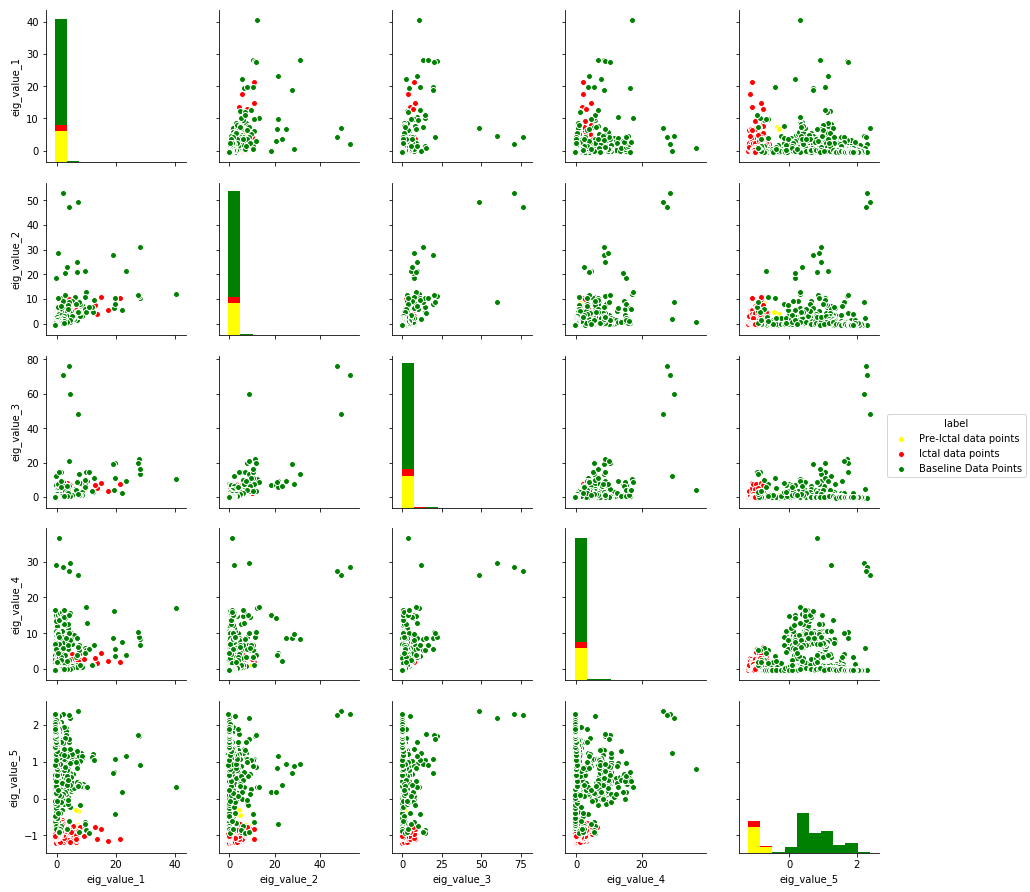

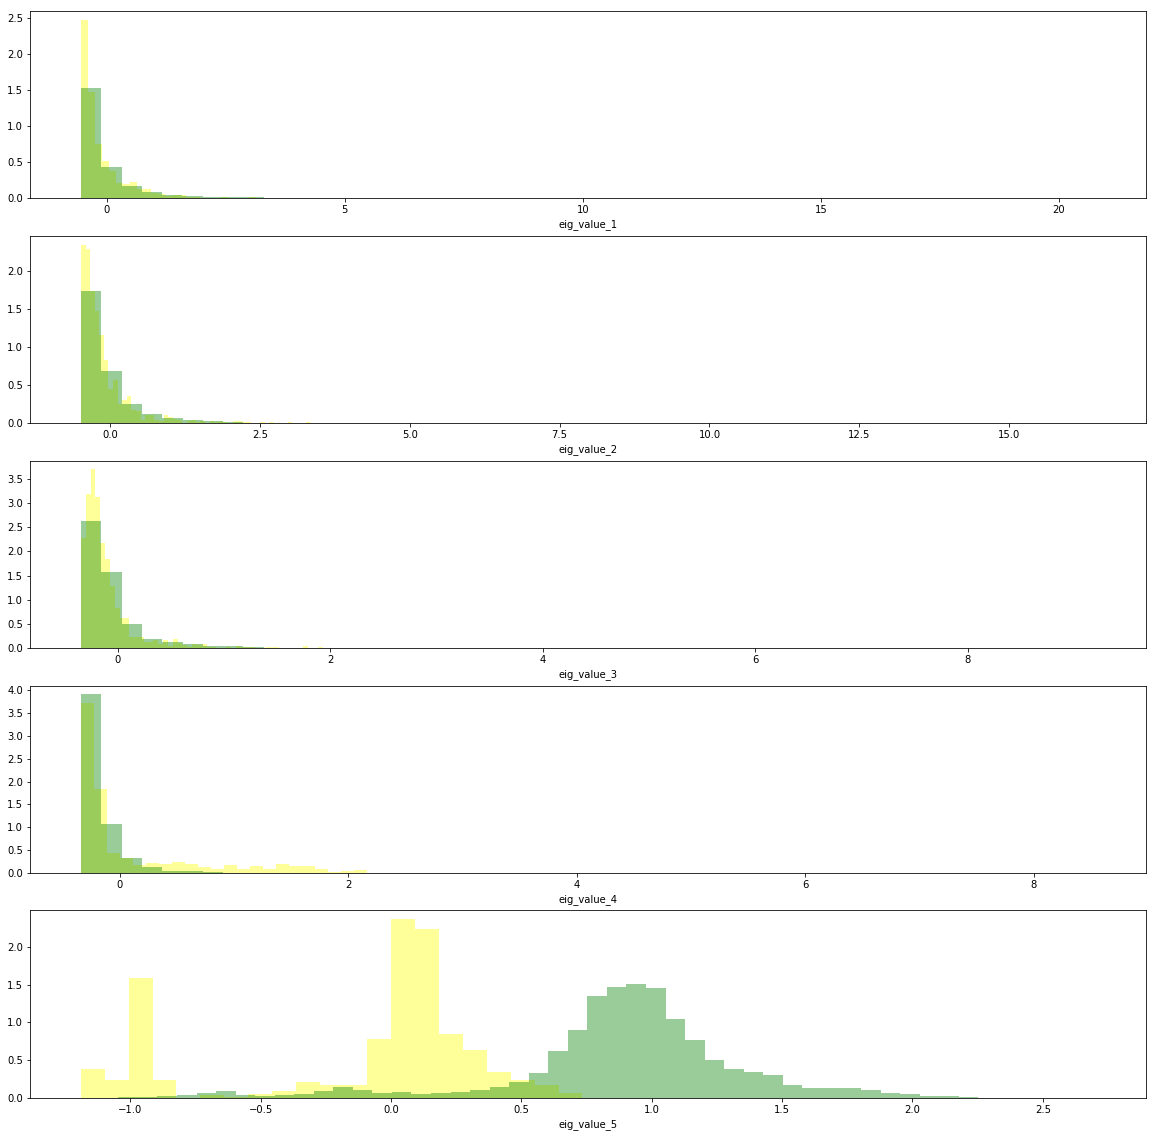

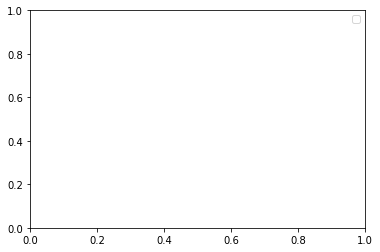

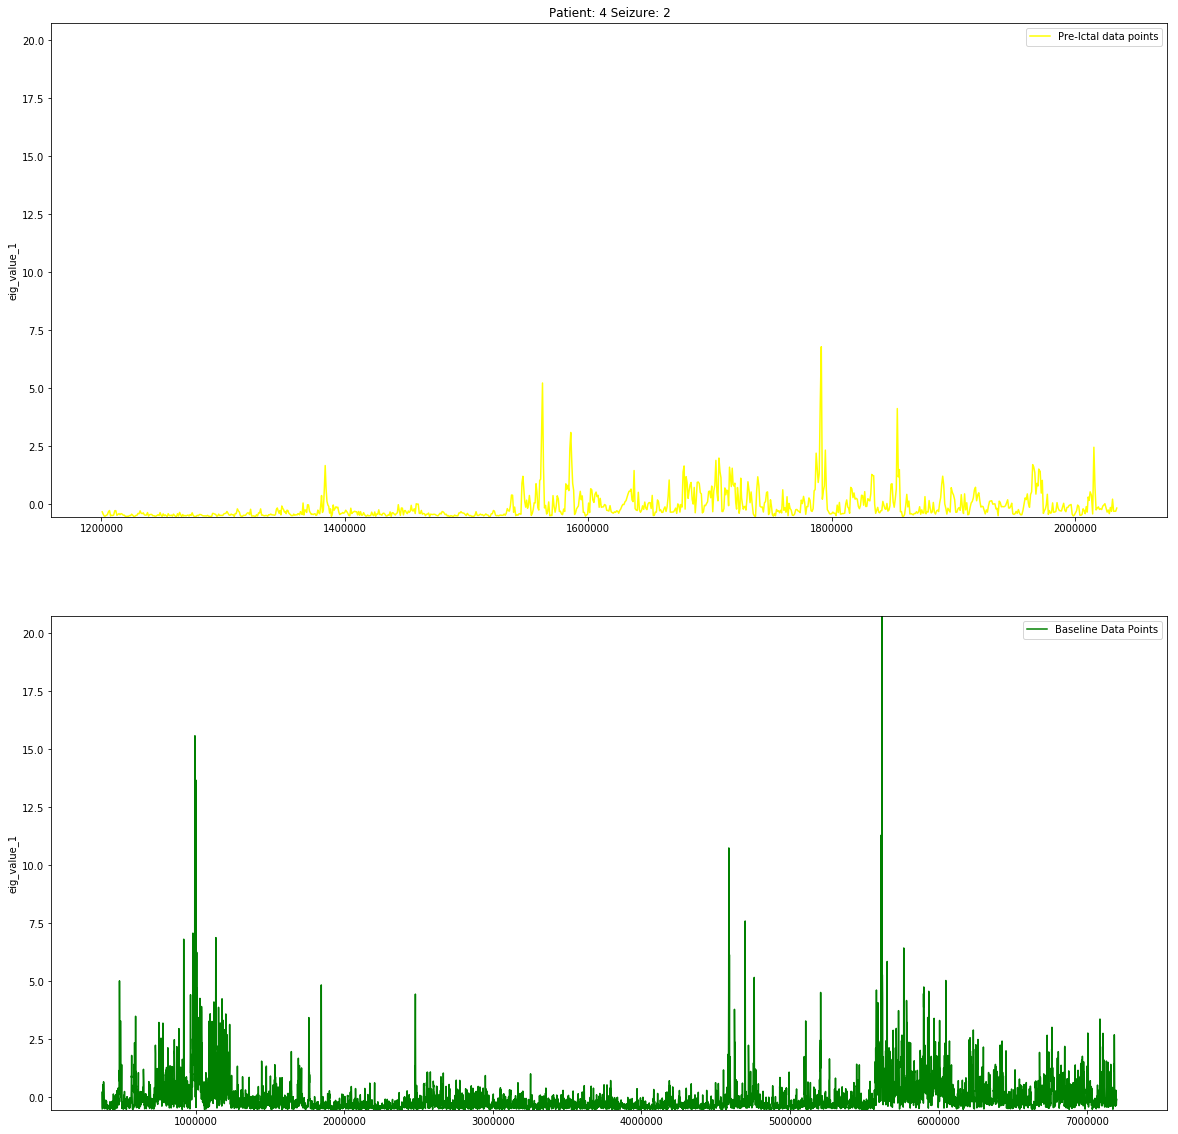

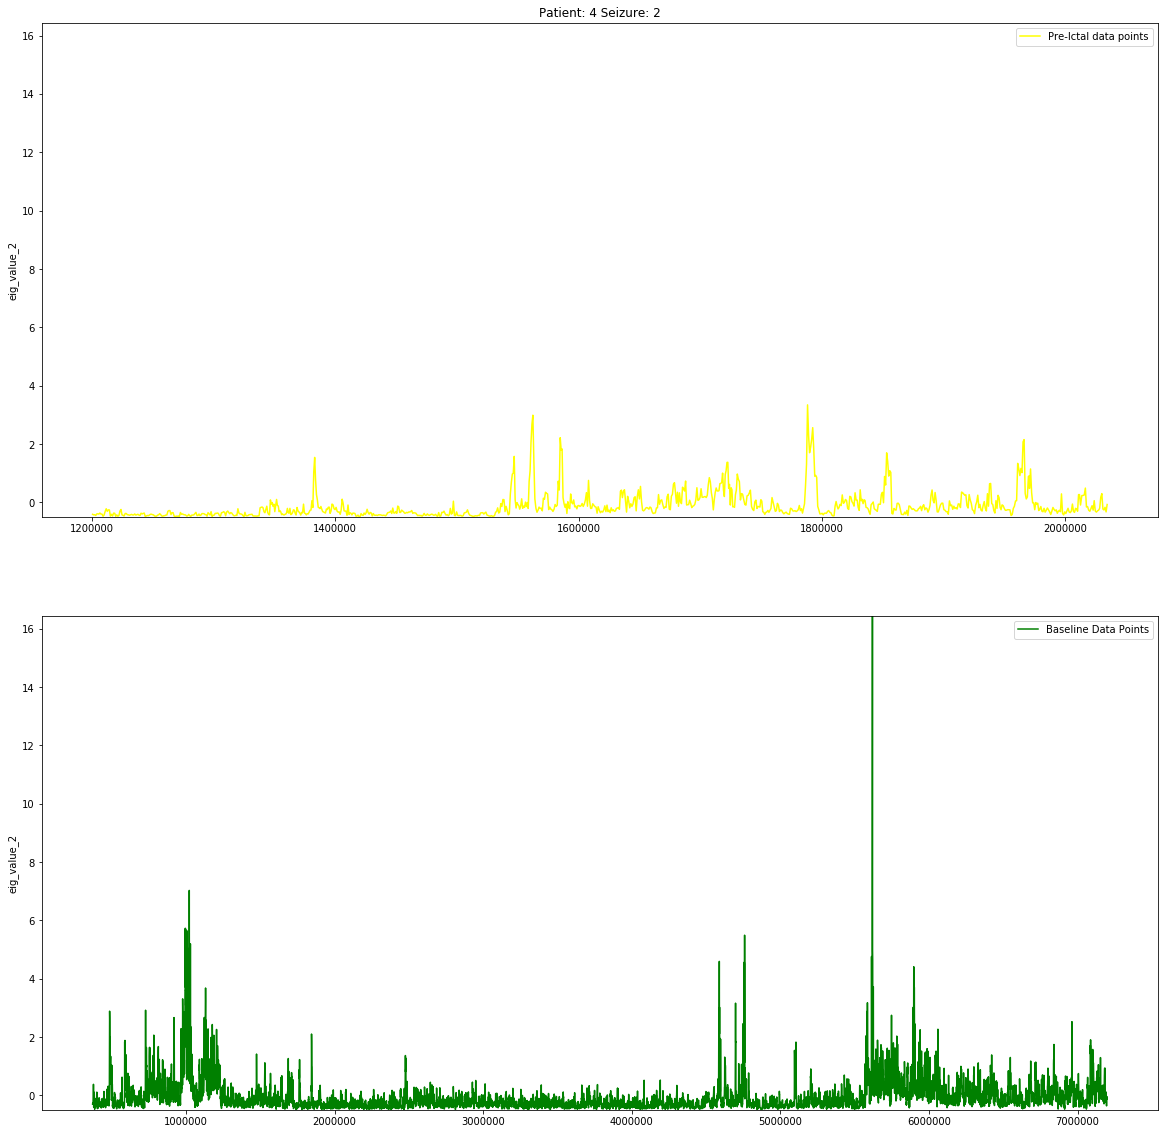

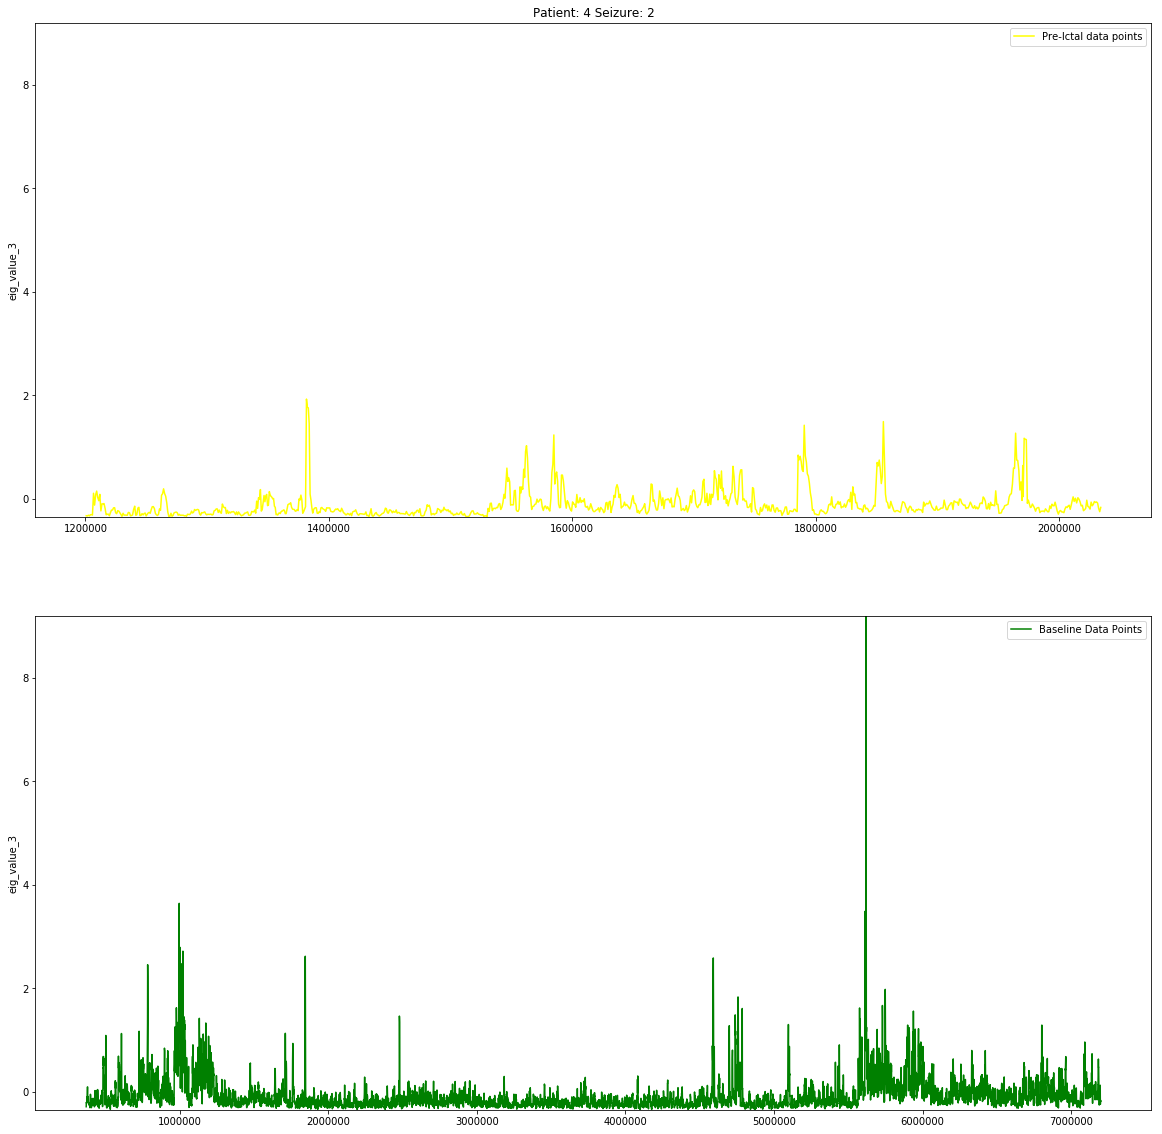

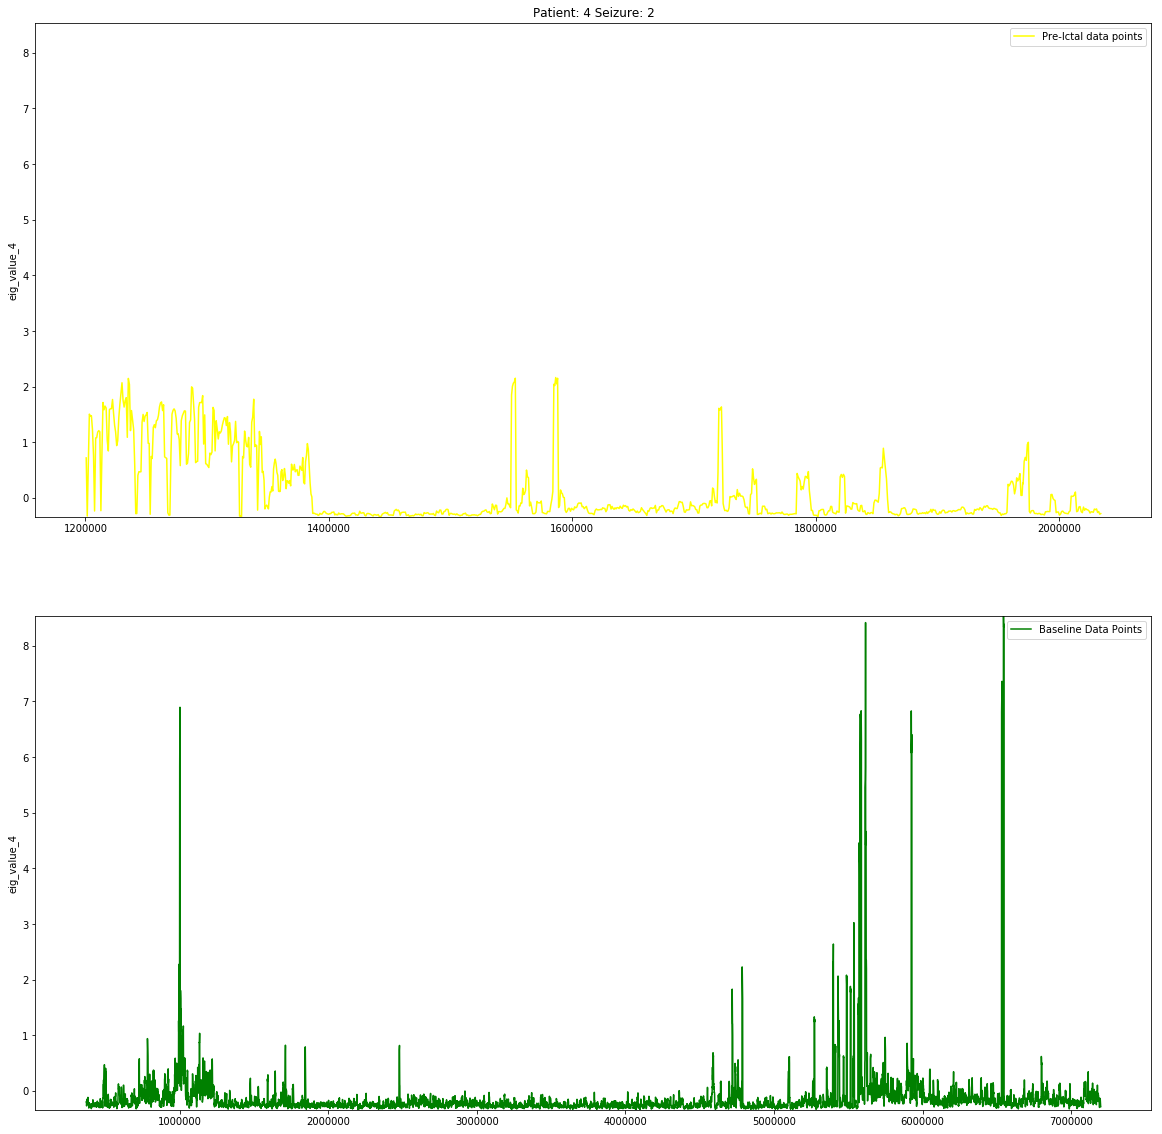

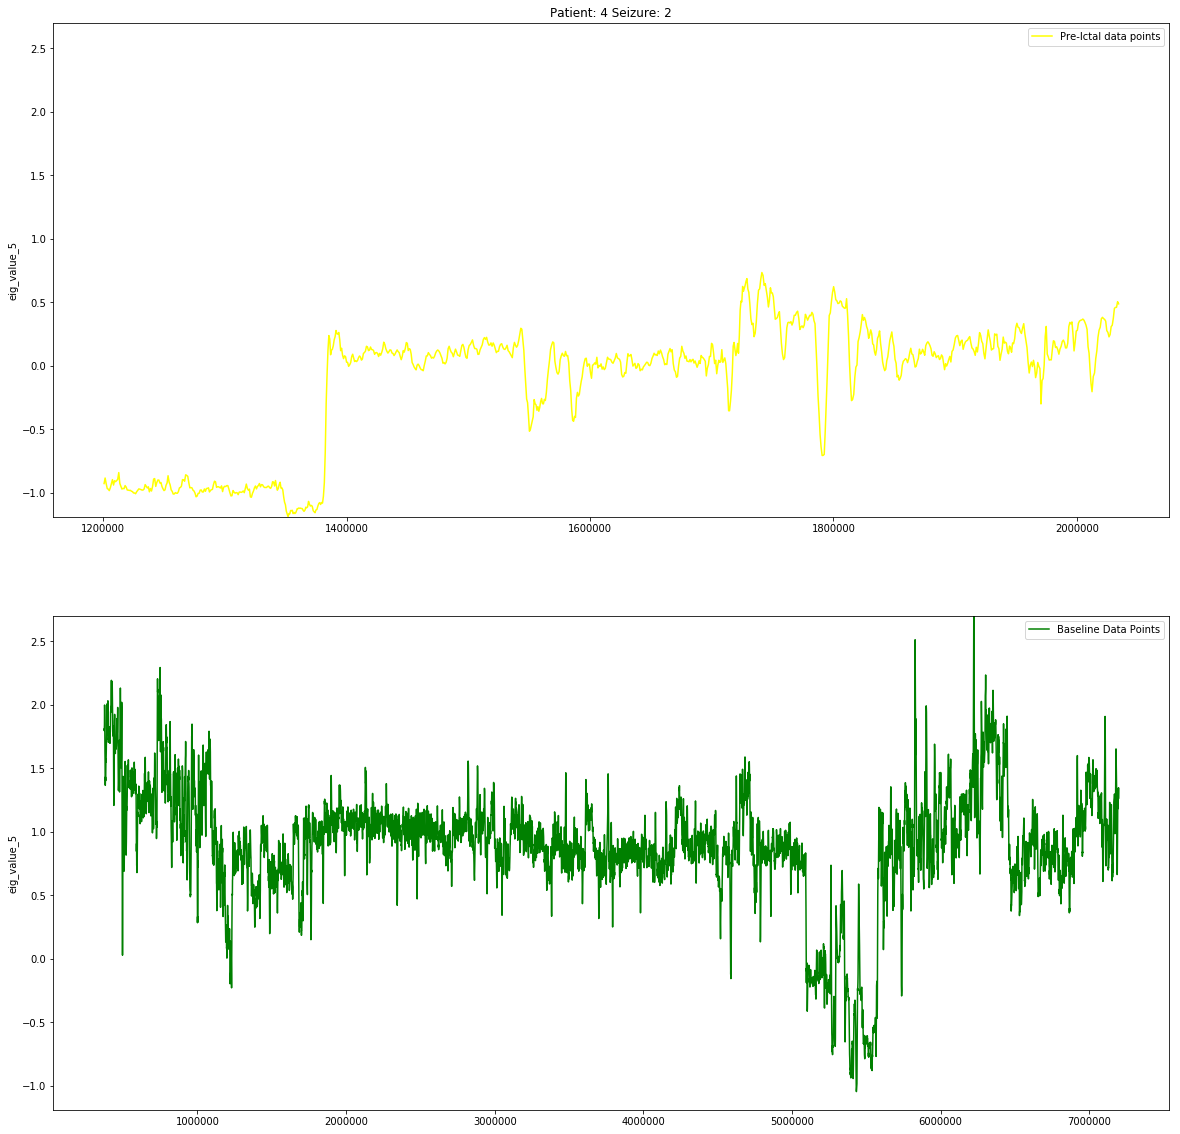

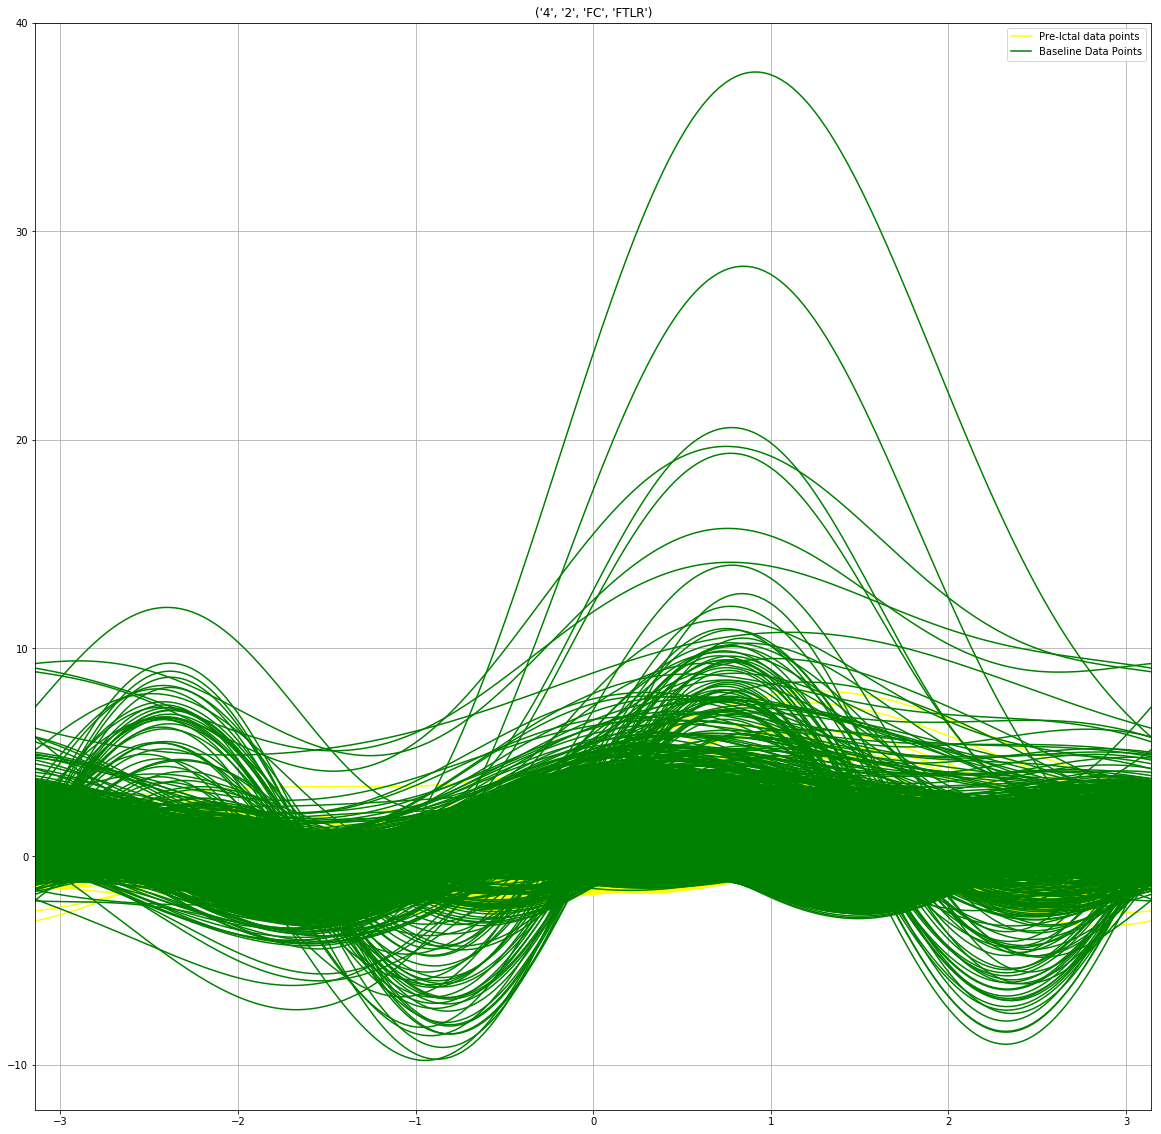

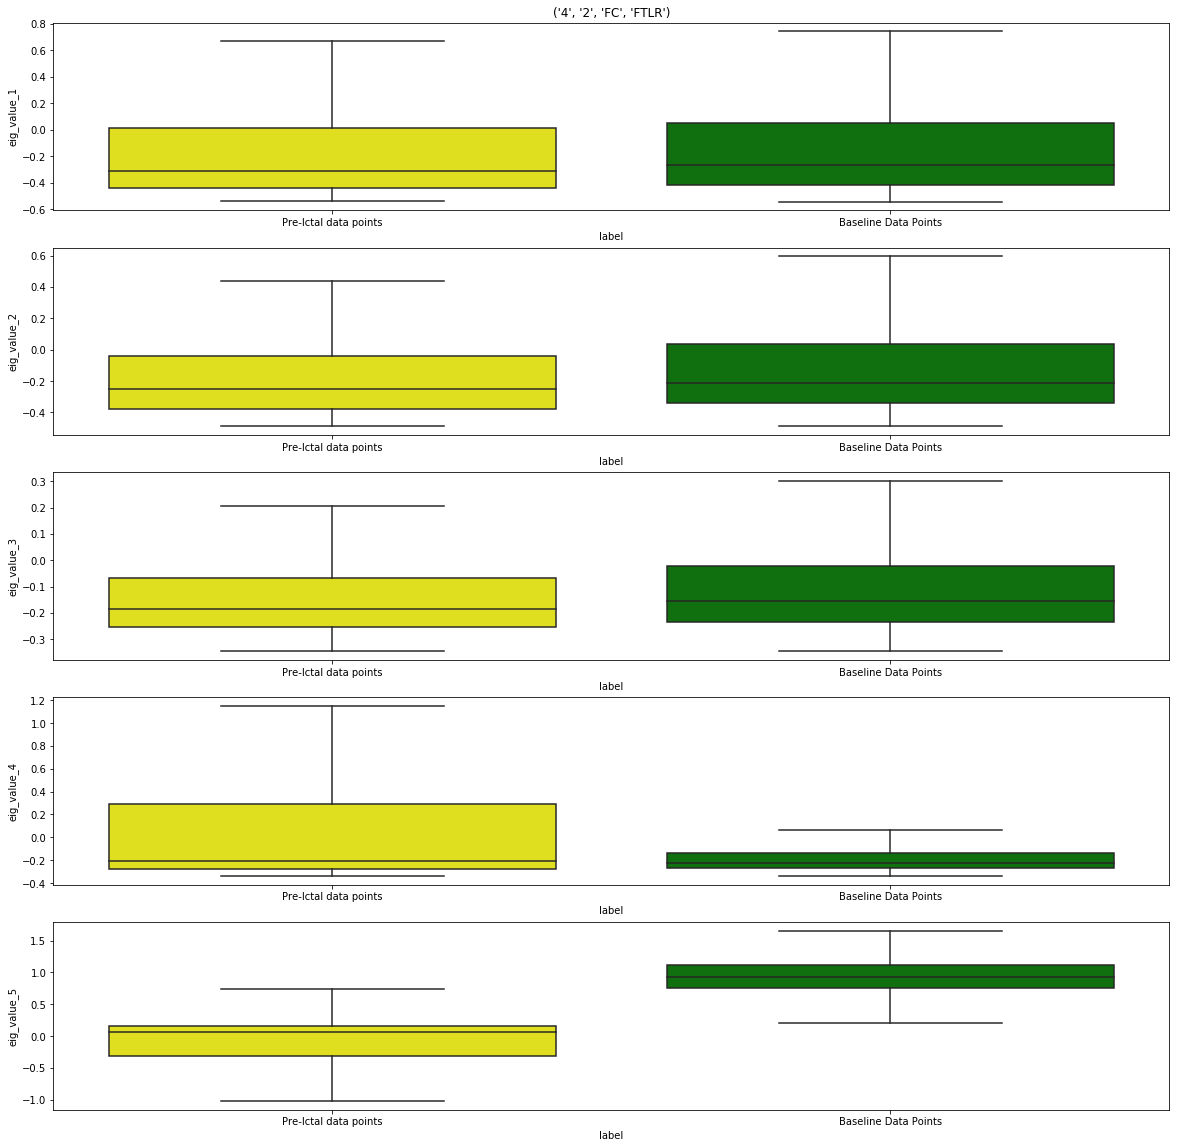

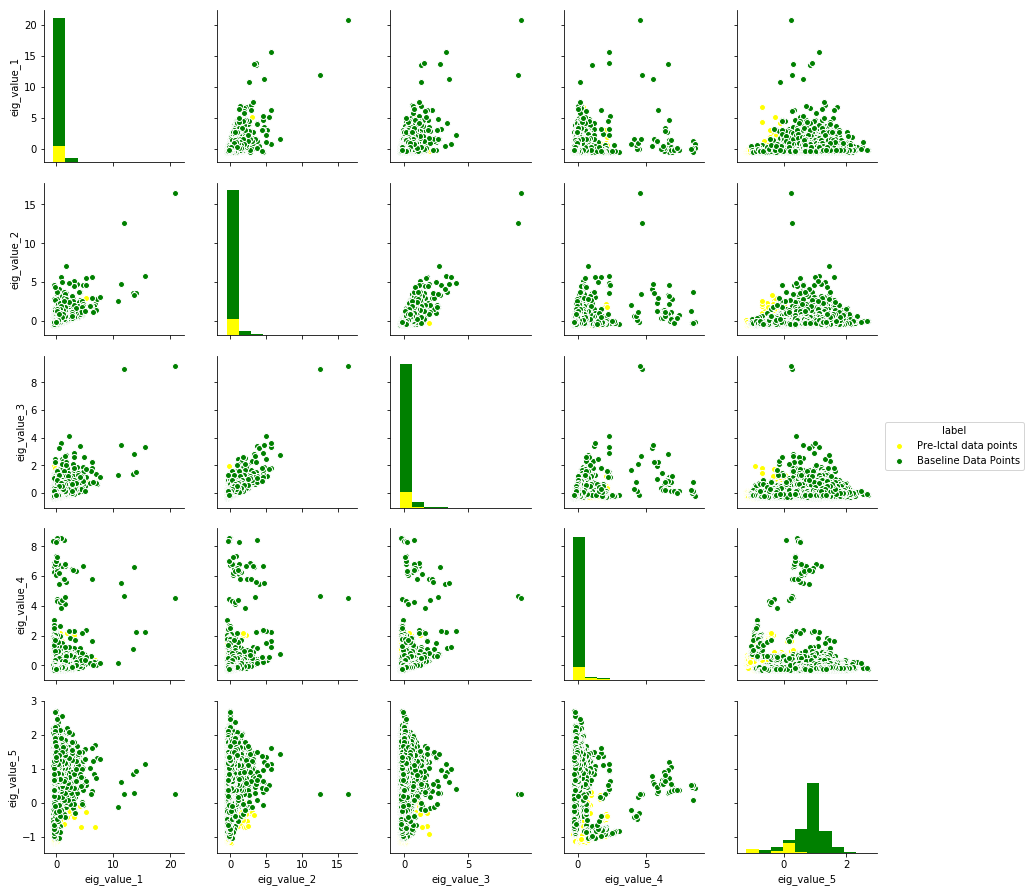

In [ ]:

import classification.eda.hist as plt_hist
import classification.eda.andrews as plt_and
import classification.eda.series as plt_ts
import classification.eda.box as plt_box
import classification.eda.scatter as plt_sc
import matplotlib.pyplot as plt


    
if plot_eda_all_new:

    for data_patient_seizure in data_groups_list:

        if flag_hist:
            plt_hist.histogram(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color',
                                     bins=hist_bins,
                                     dist=dist)


        if flag_series:
            plt_ts.time_series_plot(path_to_save, data_patient_seizure[1],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_andrews:
            plt_and.andrews_curves(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_box:
            plt_box.box_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')

        if flag_pair:

            plt_sc.pair_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')
            
else:
    import os
    from IPython.display import Image
    a = [name for name in os.listdir(path_to_save) if name.endswith(".png")]
    for image in a:
        display(Image(filename=path_to_save + image))
    
    

In [ ]:
import classification.cross_validation as cv

# ***********************************Learning****************************
# Learn from data_struct using nested cross_validation
# learninig is an optimization and respective test results
# for each partition of the dataset according to cv_out


# prepare data for classification - watch out for memory concerns
X = data[features]
y = data[label]
groups = data[group_id]

learning_results = cv.nested_cross_validation(path_to_save,
                                       X,y, groups,
                                       pipe,
                                       param_grid, scoring,
                                       compute_all_new, cv_out, cv_in,
                                       search_function)
#************************************************************************
groups = data_groups.groups.keys()

for learning_result, group in zip(learning_results, groups):
        learning_result['group'] = group
        
cv_object = learning_results

cv.generate_classification_report(cv_object)



Fitting 2 folds for each of 256 candidates, totalling 512 fits


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed: 19.2min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/0b547cb2-3def-11e8-932f-b06ebfc25cc2/0b547cb3-3def-11e8-932f-b06ebfc25cc2hp_opt_results__0.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         1.453313         1.943485            0.806792            0.368117   
1         1.119353         1.504038            0.806792            0.368117   
2         1.151037         1.833346            0.806792            0.368117   
3         1.307215         1.759030            0.806792            0.368117   
4         1.285972         1.915010            0.806792            0.368117   
5         1.448101         1.850839            0.806792            0.368117   
6         1.038254         1.416282            0.806792            0.368117   
7         1.043662         1.549294            0.812021            0.415246   
8         1.466735         1.656661 

classification/cross_validation.py:58: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['param_SVC__C', 'param_SVC__gamma', 'params']]

  for i, (train, test) in enumerate(cv_out)]



/mnt/pre_epi_seizures/EDAnalysis/0b547cb2-3def-11e8-932f-b06ebfc25cc2/0b547cb3-3def-11e8-932f-b06ebfc25cc2hp_opt_results__0.h5
HDF5 error back trace

  File "H5A.c", line 259, in H5Acreate2
    unable to create attribute
  File "H5Aint.c", line 280, in H5A_create
    unable to create attribute in object header
  File "H5Oattribute.c", line 347, in H5O_attr_create
    unable to create new attribute in header
  File "H5Omessage.c", line 224, in H5O_msg_append_real
    unable to create new message
  File "H5Omessage.c", line 1945, in H5O_msg_alloc
    unable to allocate space for message
  File "H5Oalloc.c", line 1142, in H5O_alloc
    object header message is too large

End of HDF5 error back trace

Can't set attribute 'metadata' in node:
 /mydata (Group) ''.
SAVEEEEEEEEEEEEEEEEEDDDDDDDDDDDDDDDDDDDDDDDDD
Fitting 2 folds for each of 256 candidates, totalling 512 fits


In [ ]:
import seaborn as sns
import itertools

if hyper_param_heat:
    for clf, test in learning_results:
        print clf.best_estimator_
        cv_results = clf.cv_results_
        keys = cv_results.keys()

        for grid in param_grid:
            estimator_params = [key 
                                for key in grid.keys()
                                if 'estimator' in key]
            print estimator_params
            param_bi_comb = itertools.combinations(estimator_params, r=2)

            for bi_comb in param_bi_comb:

                for key in keys:

                    if 'param' not in key and 'rank' not in key:
                        metric = cv_results[key]
                        df = metric.reshape(len([2**i for i in xrange(-5, 11)]), len([2**i for i in xrange(-15, 1)]))

                        #df = pd.DataFrame(df, columns=[str(2**i) for i in xrange(-15, 1)])
                        #df['ix'] = [str(2**i) for i in xrange(-5, 11)]
                        #df.set_index('ix')

                        plt.figure()
                        sns.heatmap(df,
                                    xticklabels=[2**i for i in xrange(-5, 11)],
                                    yticklabels=[2**i for i in xrange(-15, 1)],
                                    cbar_kws={'label': key},
                                   )
                        plt.title(key)
                        plt.xlabel(bi_comb[0])
                        plt.ylabel(bi_comb[1])
                        #plt.savefig(path_to_save + '/' + key)
                        plt.show()
                        
hyper_param_list=False                        
if hyper_param_list:
    for learning_result in learning_results:

        cv_results = learning_result['cv_results']
        keys = list(cv_results.keys())
        print keys
        
        for grid in param_grid:
            params = grid.keys()
            print params
            for param in params:
                
                key_param_variation = keys[keys.index('param_' + param)]
                param_variation = cv_results[key_param_variation]
                
                print param_variation
                stop
                
                

        

In [ ]:
from classification.cross_validation import *

In [ ]:
report = generate_classification_report(cv_object)
report.to_hdf(path_to_save + 'classification_resport.h5', '/report' )

pd.read_hdf(path_to_save + 'classification_resport.h5', '/report' )

In [ ]:
string = report.to_latex()
print string.replace('\_', " ")

In [ ]:
import numpy as np
import pandas as pd
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
s = pd.DataFrame(np.random.randn(8, 4), index=arrays)
s


In [ ]:
print s.to_latex()

In [ ]:
del classification_report

In [ ]:
best_params

In [ ]:
learning_results